# Благотворительный фонд "Бюро добрых дел"

**Задача**

- Изучить данные, разбить доноров на группы.
- Предугадать трек доната, чтобы он перешел в рекуррента
- Представить заказчику методику того, как он сможет делать это самостоятельно на обновляющихся данных.

**Цель**

- Предугадать трек активных пользователей

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-изучение-общей-информации" data-toc-modified-id="Загрузка-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Столбец-id" data-toc-modified-id="Столбец-id-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Столбец <code>id</code></a></span></li><li><span><a href="#Столбец-gender" data-toc-modified-id="Столбец-gender-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Столбец <code>gender</code></a></span></li><li><span><a href="#Столбец-city" data-toc-modified-id="Столбец-city-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Столбец <code>city</code></a></span></li><li><span><a href="#Столбец-email_date" data-toc-modified-id="Столбец-email_date-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Столбец <code>email_date</code></a></span></li><li><span><a href="#Столбец-date_payment" data-toc-modified-id="Столбец-date_payment-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Столбец <code>date_payment</code></a></span></li><li><span><a href="#Столбец-amount" data-toc-modified-id="Столбец-amount-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Столбец <code>amount</code></a></span></li><li><span><a href="#Столбец-recur" data-toc-modified-id="Столбец-recur-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Столбец <code>recur</code></a></span></li><li><span><a href="#Столбец-purpose" data-toc-modified-id="Столбец-purpose-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Столбец <code>purpose</code></a></span></li><li><span><a href="#Столбец-channel" data-toc-modified-id="Столбец-channel-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Столбец <code>channel</code></a></span></li><li><span><a href="#Подготовка-фильтрованного-датафрейма" data-toc-modified-id="Подготовка-фильтрованного-датафрейма-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Подготовка фильтрованного датафрейма</a></span></li></ul></li><li><span><a href="#Датасет-донатов,-совершающих-рекуррентные-и-не-рекуррентные-платежи" data-toc-modified-id="Датасет-донатов,-совершающих-рекуррентные-и-не-рекуррентные-платежи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Датасет донатов, совершающих рекуррентные и не рекуррентные платежи</a></span></li><li><span><a href="#Датасет-не-рекуррентов" data-toc-modified-id="Датасет-не-рекуррентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Датасет не рекуррентов</a></span></li><li><span><a href="#Датасет-рекуррентов" data-toc-modified-id="Датасет-рекуррентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Датасет рекуррентов</a></span></li><li><span><a href="#Сравнение-трех-датасетов-по-параметрам" data-toc-modified-id="Сравнение-трех-датасетов-по-параметрам-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Сравнение трех датасетов по параметрам</a></span></li><li><span><a href="#Проверка-статистических-гипотез" data-toc-modified-id="Проверка-статистических-гипотез-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Проверка статистических гипотез</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-№-1:-Доли-мужчин-и-женщин,-совершающих-только-разовые-платежи,-различаются" data-toc-modified-id="Гипотеза-№-1:-Доли-мужчин-и-женщин,-совершающих-только-разовые-платежи,-различаются-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Гипотеза № 1: Доли мужчин и женщин, совершающих только разовые платежи, различаются</a></span></li><li><span><a href="#Гипотеза-№-2:-Доли-мужчин-и-женщин,-совершающих-только-рекуррентные-платежи,-различаются" data-toc-modified-id="Гипотеза-№-2:-Доли-мужчин-и-женщин,-совершающих-только-рекуррентные-платежи,-различаются-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Гипотеза № 2: Доли мужчин и женщин, совершающих только рекуррентные платежи, различаются</a></span></li><li><span><a href="#Гипотеза-№-3:-Доли-мужчин-и-женщин,-совершивших-хотя-бы-1-рекуррентный-платеж,-различаются" data-toc-modified-id="Гипотеза-№-3:-Доли-мужчин-и-женщин,-совершивших-хотя-бы-1-рекуррентный-платеж,-различаются-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Гипотеза № 3: Доли мужчин и женщин, совершивших хотя бы 1 рекуррентный платеж, различаются</a></span></li><li><span><a href="#Гипотеза-№-4:-Доли-донатов-рекуррентов-и-не-рекуррентов,-ушедших-в-отток,-различаются" data-toc-modified-id="Гипотеза-№-4:-Доли-донатов-рекуррентов-и-не-рекуррентов,-ушедших-в-отток,-различаются-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Гипотеза № 4: Доли донатов-рекуррентов и не рекуррентов, ушедших в отток, различаются</a></span></li><li><span><a href="#Гипотеза-№-5:-Доли-ушедших-в-отток-и-оставшихся-донатов-рекуррентов-и--донатов-рекуррентов-(совершающих-дополнительные-нерекуррентные-платежи),-различаются" data-toc-modified-id="Гипотеза-№-5:-Доли-ушедших-в-отток-и-оставшихся-донатов-рекуррентов-и--донатов-рекуррентов-(совершающих-дополнительные-нерекуррентные-платежи),-различаются-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Гипотеза № 5: Доли ушедших в отток и оставшихся донатов-рекуррентов и  донатов-рекуррентов (совершающих дополнительные нерекуррентные платежи), различаются</a></span></li><li><span><a href="#Гипотеза-№-6:-Доли-мужчин-и-женщин,--ушедших-в-отток-и-оставшихся-различаются" data-toc-modified-id="Гипотеза-№-6:-Доли-мужчин-и-женщин,--ушедших-в-отток-и-оставшихся-различаются-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Гипотеза № 6: Доли мужчин и женщин,  ушедших в отток и оставшихся различаются</a></span></li><li><span><a href="#Гипотеза-№-7:-Доли-жителей-Москвы_МО-и-городов-миллионников,--ушедших-в-отток--и-оставшихся-различаются" data-toc-modified-id="Гипотеза-№-7:-Доли-жителей-Москвы_МО-и-городов-миллионников,--ушедших-в-отток--и-оставшихся-различаются-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Гипотеза № 7: Доли жителей Москвы_МО и городов-миллионников,  ушедших в отток  и оставшихся различаются</a></span></li><li><span><a href="#Гипотеза-№-8:-Средний-чек-донатов,-ушедших-в-отток-и-оставшихся-различается" data-toc-modified-id="Гипотеза-№-8:-Средний-чек-донатов,-ушедших-в-отток-и-оставшихся-различается-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Гипотеза № 8: Средний чек донатов, ушедших в отток и оставшихся различается</a></span></li><li><span><a href="#Гипотеза-№-9:-Среднее-время-между-платежами-донатов,-ушедших-в-отток-и-оставшихся-различается" data-toc-modified-id="Гипотеза-№-9:-Среднее-время-между-платежами-донатов,-ушедших-в-отток-и-оставшихся-различается-7.9"><span class="toc-item-num">7.9&nbsp;&nbsp;</span>Гипотеза № 9: Среднее время между платежами донатов, ушедших в отток и оставшихся различается</a></span></li><li><span><a href="#Гипотеза-№-10:-Лайфтайм-донатов,--ушедших-в-отток-и-оставшихся-различается" data-toc-modified-id="Гипотеза-№-10:-Лайфтайм-донатов,--ушедших-в-отток-и-оставшихся-различается-7.10"><span class="toc-item-num">7.10&nbsp;&nbsp;</span>Гипотеза № 10: Лайфтайм донатов,  ушедших в отток и оставшихся различается</a></span></li><li><span><a href="#Гипотеза-№-11:-Средний-чек-донатов,-совершаюших-разовые-и-рекуррентные-платежи-различается" data-toc-modified-id="Гипотеза-№-11:-Средний-чек-донатов,-совершаюших-разовые-и-рекуррентные-платежи-различается-7.11"><span class="toc-item-num">7.11&nbsp;&nbsp;</span>Гипотеза № 11: Средний чек донатов, совершаюших разовые и рекуррентные платежи различается</a></span></li><li><span><a href="#Гипотеза-№-12:-Среднее-время-между-платежами-донатов,-совершаюших-разовые-и-рекуррентные-платежи-различается" data-toc-modified-id="Гипотеза-№-12:-Среднее-время-между-платежами-донатов,-совершаюших-разовые-и-рекуррентные-платежи-различается-7.12"><span class="toc-item-num">7.12&nbsp;&nbsp;</span>Гипотеза № 12: Среднее время между платежами донатов, совершаюших разовые и рекуррентные платежи различается</a></span></li><li><span><a href="#Гипотеза-№-13:-Лайфтайм-донатов,-совершаюших-разовые-и-рекуррентные-платежи-различается" data-toc-modified-id="Гипотеза-№-13:-Лайфтайм-донатов,-совершаюших-разовые-и-рекуррентные-платежи-различается-7.13"><span class="toc-item-num">7.13&nbsp;&nbsp;</span>Гипотеза № 13: Лайфтайм донатов, совершаюших разовые и рекуррентные платежи различается</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7.14"><span class="toc-item-num">7.14&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Кластеризация</a></span></li></ul></div>

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt
from plotly import graph_objects as go
import math as mth

import seaborn as sns
from scipy import stats as st
from scipy.stats import mannwhitneyu as mwu
from  scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
def boxplot(df, col, lim):
    fig, ax = plt.subplots(figsize =(5, 5))
    sns.set_style('whitegrid')
    ax = sns.boxplot(x = df['recur'], y = df[col])
    ax.set(ylim = (0,lim));
    
# Функция проверки статзначимости гипотез критерием Манна-Уитни
def mwu_test(alpha, col1, col2):
    c1 = t[t[col1]==1]
    c2 = t[t[col1]==0]
    alpha = alpha
    results = mwu(c1[col2], c2[col2])
    print('p-значение:', results.pvalue)
    if results.pvalue < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")   

# Функция проверки статзначимости гипотез качественных переменных критерием хи-квадрат
def chi2(alpha, col):
    a = t.groupby([col,'churn'])['id'].nunique()
    alpha=alpha
    kf_data = np.array([[a.loc[0,0], a.loc[0,1]], [a.loc[1,0], a.loc[1,1]]])
    kf = chi2_contingency(kf_data)
    print('p-значение:', kf[1])
    if kf[1] < alpha:
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")        

In [3]:
try:
    donor = pd.read_excel('D:\Jupyter\datasets/blag_dela.xlsx', sheet_name='Доноры')
    donat = pd.read_excel('D:\Jupyter\datasets/blag_dela.xlsx', sheet_name='Пожертвования')
except:
    !gdown 1oA0KKNcBCRhtPv3Jc8cUaxMuZs2JLMkH
    donor = pd.read_excel('/content/pr_masterskaya_buro_dobryh_del_2.xlsx', sheet_name='Доноры')
    donat = pd.read_excel('/content/pr_masterskaya_buro_dobryh_del_2.xlsx', sheet_name='Пожертвования')
    
display(donor.head())
donat.head()

,ID,Пол,Город,Дата последней email активности
0,AF575B85-917F-475D-8875-00055586E05B,NaN,NaN,NaT
1,229A9B43-3A15-4A48-8CB6-000EDB240D50,NaN,NaN,NaT
2,C6606486-05A8-4437-ACF9-00344E54FEE1,NaN,NaN,NaT
3,6ED86154-A688-4A11-868F-006209035413,Женский ...,NaN,NaT
4,46C41E20-EA56-4698-9C37-00692FD6FFE8,Женский ...,NaN,NaT


,Donor ID,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты
0,DE5393F9-9585-4057-B7FB-24B69697FC08,2022-07-03 19:49:48,300.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты
1,81CD4BEF-443E-4D36-B34F-664E11182D65,2020-03-14 12:20:02,300.0,Нет ...,SMS bdd,SMS
2,D3BEB76D-D8B6-47E2-8109-44F1B278943B,2022-04-07 00:00:00,16.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
3,F1310736-B229-4AAC-99B7-F13ACECF67CB,2019-12-26 02:25:42,300.0,Нет ...,NaN,SMS
4,61C3D86B-39DA-445C-9D7F-9924CE9BDA14,2021-06-26 01:26:07,200.0,Да ...,ПОЖЕРТВОВАНИЕ undefined,Банковские карты


Проверка уникальных пользователей в обеих таблицах

In [4]:
print(len(donor['ID'].unique()))
len(donat['Donor ID'].unique())

3683


3683

Переименуем столбцы для объединения таблиц

In [5]:
donor=donor.rename(columns={'ID': 'id'})
donat=donat.rename(columns={'Donor ID': 'id'})

In [6]:
print(donor.duplicated().sum())
donat.duplicated().sum()

0


12

Объединим таблицы, т.к. в файлах совпадает уникальное количество пользователей

In [7]:
df = donor.merge(donat, on = 'id', how = 'left')
df.head()

,id,Пол,Город,Дата последней email активности,Дата платежа,Сумма платежа,Рекуррентный,Назначение платежа,Канал оплаты
0,AF575B85-917F-475D-8875-00055586E05B,NaN,NaN,NaT,2019-07-06 15:23:53,100.0,Нет ...,NaN,SMS
1,229A9B43-3A15-4A48-8CB6-000EDB240D50,NaN,NaN,NaT,2017-07-18 09:01:24,500.0,Нет ...,NaN,SMS
2,C6606486-05A8-4437-ACF9-00344E54FEE1,NaN,NaN,NaT,2019-10-21 18:31:00,300.0,Нет ...,NaN,SMS
3,6ED86154-A688-4A11-868F-006209035413,Женский ...,NaN,NaT,2021-04-13 00:00:00,500.0,Нет ...,Добровольное пожертвование. НДС не облагается,Прямые поступления на счет
4,46C41E20-EA56-4698-9C37-00692FD6FFE8,Женский ...,NaN,NaT,2019-09-10 15:50:55,1042.0,Нет ...,ПОЖЕРТВОВАНИЕ,Банковские карты


Изучим общую информацию

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14043 entries, 0 to 14042
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               14043 non-null  object        
 1   Пол                              12473 non-null  object        
 2   Город                            6738 non-null   object        
 3   Дата последней email активности  11073 non-null  datetime64[ns]
 4   Дата платежа                     14043 non-null  datetime64[ns]
 5   Сумма платежа                    14043 non-null  float64       
 6   Рекуррентный                     14043 non-null  object        
 7   Назначение платежа               12774 non-null  object        
 8   Канал оплаты                     14043 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.1+ MB


## Подготовка данных

Переименуем столбцы

In [9]:
df=df.rename(columns={'Пол': 'gender',
                      'Город':'city', 
                      'Дата последней email активности' : 'email_date', 
                      'Дата платежа' : 'date_payment', 
                      'Сумма платежа' : 'amount',
                      'Рекуррентный' : 'recur', 
                      'Назначение платежа' : 'purpose', 
                      'Канал оплаты' : 'channel'})

Проверка дубликатов после объединения таблиц и их удаление

In [10]:
df.duplicated().sum()

12

In [11]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14043 entries, 0 to 14042
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            14043 non-null  object        
 1   gender        12473 non-null  object        
 2   city          6738 non-null   object        
 3   email_date    11073 non-null  datetime64[ns]
 4   date_payment  14043 non-null  datetime64[ns]
 5   amount        14043 non-null  float64       
 6   recur         14043 non-null  object        
 7   purpose       12774 non-null  object        
 8   channel       14043 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 1.1+ MB


In [12]:
for col in df.select_dtypes('object').columns:
    df[col] = df[col].str.lower().str.strip()

In [13]:
df.head(2)

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel
0,af575b85-917f-475d-8875-00055586e05b,NaN,NaN,NaT,2019-07-06 15:23:53,100.0,нет,NaN,sms
1,229a9b43-3a15-4a48-8cb6-000edb240d50,NaN,NaN,NaT,2017-07-18 09:01:24,500.0,нет,NaN,sms


In [14]:
df.isna().mean()

id              0.000000
gender          0.111799
city            0.520188
email_date      0.211493
date_payment    0.000000
amount          0.000000
recur           0.000000
purpose         0.090437
channel         0.000000
dtype: float64

In [15]:
df.describe(include=['object', 'datetime64[ns]'])

,id,gender,city,email_date,date_payment,recur,purpose,channel
count,14043,12473,6738,11073,14043,14043,12773,14043
unique,3683,2,228,653,13386,2,873,4
top,8a8daecd-40b3-4a41-b53c-06a62be672e6,женский,москва,2022-07-18 16:29:48,2021-04-12 00:00:00,да,пожертвование,банковские карты
freq,83,9679,3643,2183,9,8085,3837,11204
first,NaN,NaN,NaN,2020-01-30 11:41:46,2015-07-19 20:10:11,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-07-28 20:34:28,2022-07-28 19:22:15,NaN,NaN,NaN


In [16]:
df.describe()

,amount
count,1.404300e+04
mean,1.720846e+03
std,2.949977e+04
min,1.000000e-02
25%,1.500000e+02
50%,3.500000e+02
75%,7.000000e+02
max,3.000000e+06


### Столбец `id`

In [17]:
df['id'].nunique()

3683

### Столбец `gender`

In [18]:
df['gender'].unique()

array([nan, 'женский', 'мужской'], dtype=object)

In [19]:
df['gender'] = df['gender'].fillna('no_info')

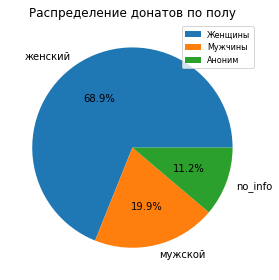

In [20]:
df.gender.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,4))
plt.legend(["Женщины", 'Мужчины', 'Аноним'], fontsize=8, facecolor='w')
plt.title('Распределение донатов по полу')
plt.tight_layout()
plt.axis('off');

### Столбец `city`

In [21]:
df['city'].value_counts()

москва             3643
санкт-петербург     494
краснодар           223
якутск              132
мытищи               93
                   ... 
louisville            1
нягань                1
донецк                1
калуга                1
кушва                 1
Name: city, Length: 228, dtype: int64

In [22]:
df['city'].unique()

array([nan, 'брянск', 'истра', 'москва', 'бирск', 'казань', 'ижевск',
       'southall', 'засечное', 'самара', 'frankfurt am main',
       'новосибирск', 'березка', 'павловск', 'кингисеппский',
       'черноголовка', 'краснодар', 'якутск', 'владивосток', 'charleston',
       'феодосия', 'кемерово', 'уфа', 'ульяновск', 'саров', 'боровский',
       'стерлитамак', 'нижний новгород', 'бухарест', 'саратов', 'lucca',
       'северск', 'усть-илимск', 'санкт-петербург', 'киров', 'йошкар-ола',
       'новокуйбышевск', 'тверь', 'волхов', 'лениногорск', 'химки',
       'омск', 'заречный', 'фрязино', 'хабаровск', 'сочи', 'балашиха',
       'астрахань', 'арзамас', 'королев', 'тобольск', 'denver',
       'альметьевск', 'набережные челны', 'пижанка', 'пермь', 'улан-удэ',
       'челябинск', 'чебоксары', 'дубна', 'щелково', 'багдарин', 'орёл',
       'ярославль', 'brooklyn', 'симферополь', 'пойковский',
       'константиновск', 'riga', 'тольятти', 'лыткарино',
       'fort lauderdale', 'старый оскол',

In [23]:
def city_category(city):
    not_rf = ['southall', 'frankfurt am main',
       'charleston', 'бухарест', 'lucca', 'denver',
       'brooklyn', 'riga', 'fort lauderdale', 'copenhagen', 'tartu',
       'saint-etienne-de-valoux', 'киев', 'landskrona', 'донецк', 'louisville',
       'prague', 'berlin', 'antalya', 'seoul', 'juba', 'ереван',
        'bad voslau', 'jakarta', 'garching bei munchen', 'holon', 
       'keighley', 'tromsø', 'naples', 'liberec', 'leawood', 'san jose', 'vienna',
       "villanova d'asti", 'herndon', 'charlestown', 'podgorica', 'london', 'helsinki',
        'alameda', 'istanbul','hyderabad', 'bristol', 'vancouver', 'margate'] 
     
    moscow = ['москва', 'апрелевка', 'балашиха', 'бронницы', 'верея', 'видное', 'волоколамск', 'воскресенск', 'высоковск',
'голицыно', 'горловка', 'дзержинский', 'дмитров', 'долгопрудный', 'домодедово', 'дрезна', 'дубна', 'егорьевск', 'жуковский', 'зарайск',
'звенигород', 'ивантеевка', 'истра', 'кашира' , 'климовск', 'клин', 'коломна', 'королев', 'котельники', 'красмоармейск',
'красногорск', 'краснозаводск', 'краснознаменск', 'кубинка', 'куровское', 'ликино-дулево', 'лобня', 'лосино-петровский', 
'луховицы', 'лыткарино', 'люберцы', 'можайск', 'мытищи', 'наро-фоминск', 'ногинск', 'одинцово', 'озеры', 'орехово-зуево',
'павловский посад', 'пересвет', 'подольск', 'протвино', 'пушкино', 'пущино', 'раменское', 'реутов', 'рошаль', 'руза',
'сергиев посад', 'серпухов', 'солнечногорск', 'старая купавна', 'ступино', 'талдом', 'фрязино', 'химки' , 'хотьково',
'черноголовка' , 'чехов', 'шатура', 'щелково', 'электрогорск', 'электросталь', 'электроугли', 'юбилейный', 'яхрома']

    mil = ['санкт-петербург', 'новосибирск', 'екатеринбург', 'казань', 'нижний новгород', 'челябинск', 'самара', 'уфа',
       'ростов-на-дону', 'омск', 'волгоград','красноярск','воронеж','пермь']
    
    if city.loc['city'] in moscow:
        return 'Москва_МO'
    elif city.loc['city'] in mil:
        return 'города-миллионники'
    elif city.loc['city'] in not_rf:
        return 'не_рф'
    elif city.loc['city'] == 0:
        return 'no_info'
    else:
        return 'другие_города'

df['city'] = df['city'].fillna(0)

df['city_category'] = df.apply(city_category, axis=1)
# удалим столбец 'city'
#df1 = df1.drop('city',axis=1)

df.head()

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel,city_category
0,af575b85-917f-475d-8875-00055586e05b,no_info,0,NaT,2019-07-06 15:23:53,100.0,нет,NaN,sms,no_info
1,229a9b43-3a15-4a48-8cb6-000edb240d50,no_info,0,NaT,2017-07-18 09:01:24,500.0,нет,NaN,sms,no_info
2,c6606486-05a8-4437-acf9-00344e54fee1,no_info,0,NaT,2019-10-21 18:31:00,300.0,нет,NaN,sms,no_info
3,6ed86154-a688-4a11-868f-006209035413,женский,0,NaT,2021-04-13 00:00:00,500.0,нет,добровольное пожертвование. ндс не облагается,прямые поступления на счет,no_info
4,46c41e20-ea56-4698-9c37-00692fd6ffe8,женский,0,NaT,2019-09-10 15:50:55,1042.0,нет,пожертвование,банковские карты,no_info


In [24]:
df['city_category'].value_counts()

no_info               7305
Москва_МO             3943
другие_города         1380
города-миллионники    1063
не_рф                  352
Name: city_category, dtype: int64

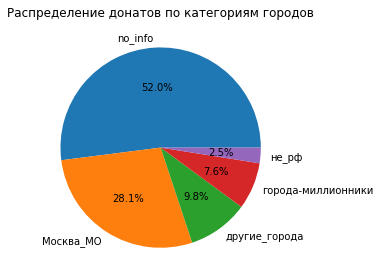

In [25]:
df.city_category.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,4))
plt.title('Распределение донатов по категориям городов')
plt.tight_layout()
plt.axis('off');

### Столбец `email_date`

In [26]:
df['email_date'].nunique()

653

In [27]:
df['email_date'].min()

Timestamp('2020-01-30 11:41:46')

In [28]:
df['email_date'].max()

Timestamp('2022-07-28 20:34:28')

### Столбец `date_payment`

In [29]:
#df['date_payment'] = df['date_payment'].astype('datetime64[M]')
df.head(1)

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel,city_category
0,af575b85-917f-475d-8875-00055586e05b,no_info,0,NaT,2019-07-06 15:23:53,100.0,нет,NaN,sms,no_info


In [30]:
df = df.sort_values(by =['id', 'date_payment'])
df.head(3)

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel,city_category
11314,0001afdd-94e3-48f3-b5e7-d5539700425e,no_info,0,NaT,2019-04-26 19:19:24,100.0,нет,NaN,sms,no_info
4920,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-03-27 08:23:58,500.0,да,пожертвование,банковские карты,no_info
4903,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-04-29 08:24:29,500.0,да,пожертвование,банковские карты,no_info


In [31]:
df['date_payment'].min()

Timestamp('2015-07-19 20:10:11')

In [32]:
df['date_payment'].max()

Timestamp('2022-07-28 19:22:15')

Имеем данные с 19 июля 2015 года по 28 июля 2022 года

In [33]:
df_time_min = df.groupby (by = 'id').agg({'date_payment': 'first'}).rename(columns={'date_payment': 'first_date'})
df_time_min.head(10)

,first_date
id,
0001afdd-94e3-48f3-b5e7-d5539700425e,2019-04-26 19:19:24
000711b2-2785-461b-bf5b-5cb7d2caba20,2020-03-27 08:23:58
0015a100-2d8c-4262-a9b3-bb1461c0c8b8,2021-07-27 12:15:05
002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,2017-04-27 08:26:17
006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,2019-04-27 00:02:19
008883d4-0182-4a4d-942c-4e55328a2c38,2019-09-10 10:32:31
008ff16b-30c0-4b44-9141-10f9bab17901,2019-07-24 18:37:59
009fa801-1558-4699-b0fe-8debbf161195,2017-11-07 10:21:01
00adba34-1edc-4652-a559-1c0be379a0da,2019-09-10 10:34:52


In [34]:
df_time_max = df.groupby (by = 'id').agg({'date_payment': 'last'}).rename(columns={'date_payment': 'last_date'})
df_time_max.head(10)

,last_date
id,
0001afdd-94e3-48f3-b5e7-d5539700425e,2019-04-26 19:19:24
000711b2-2785-461b-bf5b-5cb7d2caba20,2022-06-27 08:24:05
0015a100-2d8c-4262-a9b3-bb1461c0c8b8,2021-07-27 12:17:06
002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,2017-04-27 08:26:17
006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,2019-04-27 00:02:19
008883d4-0182-4a4d-942c-4e55328a2c38,2019-09-10 10:32:31
008ff16b-30c0-4b44-9141-10f9bab17901,2019-07-24 18:37:59
009fa801-1558-4699-b0fe-8debbf161195,2017-11-07 10:21:01
00adba34-1edc-4652-a559-1c0be379a0da,2022-04-13 11:36:54


In [35]:
df_time = df_time_min.merge(df_time_max, on = 'id', how = 'left')
df_time.head()

,first_date,last_date
id,,
0001afdd-94e3-48f3-b5e7-d5539700425e,2019-04-26 19:19:24,2019-04-26 19:19:24
000711b2-2785-461b-bf5b-5cb7d2caba20,2020-03-27 08:23:58,2022-06-27 08:24:05
0015a100-2d8c-4262-a9b3-bb1461c0c8b8,2021-07-27 12:15:05,2021-07-27 12:17:06
002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,2017-04-27 08:26:17,2017-04-27 08:26:17
006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,2019-04-27 00:02:19,2019-04-27 00:02:19


In [36]:
df_time['lifetime']=(df_time['last_date']-df_time['first_date']).dt.days
df_time.head()

,first_date,last_date,lifetime
id,,,
0001afdd-94e3-48f3-b5e7-d5539700425e,2019-04-26 19:19:24,2019-04-26 19:19:24,0
000711b2-2785-461b-bf5b-5cb7d2caba20,2020-03-27 08:23:58,2022-06-27 08:24:05,822
0015a100-2d8c-4262-a9b3-bb1461c0c8b8,2021-07-27 12:15:05,2021-07-27 12:17:06,0
002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,2017-04-27 08:26:17,2017-04-27 08:26:17,0
006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,2019-04-27 00:02:19,2019-04-27 00:02:19,0


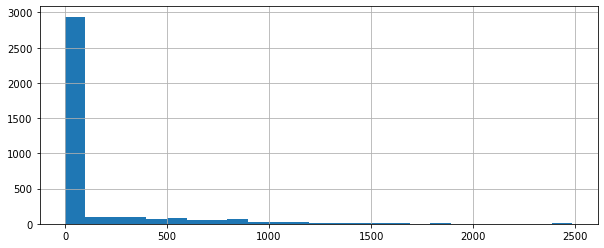

In [37]:
df_time['lifetime'].hist(bins = 25, figsize = (10, 4));

In [38]:
df_time.describe()

,lifetime
count,3683.000000
mean,130.024165
std,325.924253
min,0.000000
25%,0.000000
50%,0.000000
75%,21.000000
max,2486.000000


Более 50% донатов совершили только 1 платеж.

In [39]:
df=df.merge(df_time, on = 'id', how = 'left')
df.head()

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel,city_category,first_date,last_date,lifetime
0,0001afdd-94e3-48f3-b5e7-d5539700425e,no_info,0,NaT,2019-04-26 19:19:24,100.0,нет,NaN,sms,no_info,2019-04-26 19:19:24,2019-04-26 19:19:24,0
1,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-03-27 08:23:58,500.0,да,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822
2,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-04-29 08:24:29,500.0,да,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822
3,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-05-28 08:24:10,500.0,да,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822
4,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-07-27 08:24:02,500.0,да,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822


### Столбец `amount`

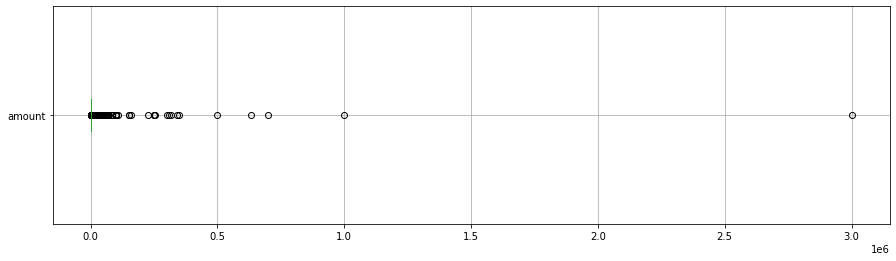

In [40]:
df.boxplot('amount', figsize = (15, 4), vert=False);

По графику видно, что имеется большое количество выбросов. Поэтому дальше  более детально будем изучать только платежи меньше 200 тыс.руб.

In [41]:
df['amount'].describe()

count    1.404300e+04
mean     1.720846e+03
std      2.949977e+04
min      1.000000e-02
25%      1.500000e+02
50%      3.500000e+02
75%      7.000000e+02
max      3.000000e+06
Name: amount, dtype: float64

Средний платеж составляет 1720 рублей, а медианный 350 рублей.

### Столбец `recur`

In [42]:
df['recur'].value_counts()

да     8085
нет    5958
Name: recur, dtype: int64

Присвоим рекуррентным платежам значение "1", а не рекуррентным - "0"

In [43]:
df['recur'] = (df['recur'].isin(['да']))*1
df['recur'].value_counts()

1    8085
0    5958
Name: recur, dtype: int64

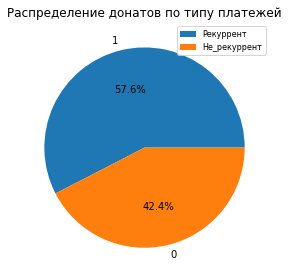

In [44]:
df.recur.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,4))
plt.legend(["Рекуррент", 'Не_рекуррент'], fontsize=8, facecolor='w')
plt.title('Распределение донатов по типу платежей')
plt.tight_layout()
plt.axis('off');

### Столбец `purpose`

In [45]:
df['purpose'].unique()

array([nan, 'пожертвование',
       'на обучение дарьи и софии в театральной студии',
       'на ресурсный центр',
       'пожертвование в фонд помощи детям-отказникам и детям-сиротам "бюро добрых дел"',
       'день рождения со смыслом_м. виторган', 'на обучение дмитрия',
       'на обучение полины', 'sms bdd',
       'добровольное пожертвование. ндс не облагается',
       'пожертвование на обучение александры', 'на работу фонда',
       'добровольное пожертвование;сумма 200 руб.;комиссия 0 руб;дата оплаты 10/06/2019;',
       'разово', 'на обучение сергея', 'добровольное пожертвование',
       'на проживание коли и димы',
       'добровольное пожертвование;сумма 250 руб.;комиссия 0 руб;дата оплаты 13/09/2019;',
       'пожертвование на программу "школа семьи""', 'на обучение леры',
       'добровольное пожертвование;на проживание евгении цпд "ченцовский" костромской области;сумма 1000 руб.;комиссия 0 руб;дата оплаты 13/04/2020;',
       'добровольное пожертвование;юре воспитаннику д.

In [46]:
df['purpose'].nunique()

873

Посмотрим на топ-30 назначений пожертвований

In [47]:
df['purpose'].value_counts().reset_index().head(30)

,index,purpose
0,пожертвование,3837
1,пожертвование в фонд помощи детям-отказникам и...,3335
2,пожертвование undefined,2162
3,добровольное пожертвование. ндс не облагается,497
4,sms bdd,253
5,пожертвование клуб друзей,127
6,на психологические консультации артёму,87
7,пожертвование без назначения,72
8,пожертвование на обучение артёма,62
9,пожертвование на обучение александры,59


In [48]:
df['purpose'] = df['purpose'].astype('str')

In [49]:
# функция для категоризации целей пожертвований
def purpose_category (row):
    if 'пожертвование' in row or 'взнос' in row or 'благотворит' in row or 'фонд' in row:
        return 'пожертвование фонду'
    elif 'на обучение' in row or 'на тьютора' in row or 'на психологическую' in row or 'на проживание' in row or 'консультации' in row:
        return 'именное пожертвование'
    elif 'nan' in row or 'sms' in row:
        return 'sms'
    elif 'возврат' in row:
        return 'возврат'
    elif 'пополнение'in row:
        return 'пополнение рс'
    else:
        return 'пожертвование на программу'
    return row


df['purpose_category'] = df['purpose'].apply(purpose_category)

df.sample(10)

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel,city_category,first_date,last_date,lifetime,purpose_category
10652,bf81beeb-2d44-49e9-b990-69b5bb5352a5,женский,0,NaT,2022-05-17 00:00:00,1.0,0,добровольное пожертвование. ндс не облагается,прямые поступления на счет,no_info,2022-05-17 00:00:00,2022-07-18 00:00:00,62,пожертвование фонду
6478,7acbad2b-6bbb-4427-a97e-0db9d818eb92,женский,ульяновск,2022-07-21 06:23:09,2022-06-27 09:55:32,300.0,1,пожертвование,банковские карты,другие_города,2020-05-27 09:55:23,2022-07-27 09:55:36,791,пожертвование фонду
897,100b2146-e7a1-45cc-8e97-22cde8fca242,женский,москва,2022-07-18 16:29:48,2021-12-25 08:58:35,1000.0,0,на обучение александры,банковские карты,Москва_МO,2021-12-25 08:58:35,2022-07-25 14:47:49,212,именное пожертвование
381,08c3988b-c0ff-44ee-83bf-5a75e18110d2,женский,сочи,2022-07-23 01:31:01,2020-01-05 21:28:33,100.0,1,пожертвование undefined,банковские карты,другие_города,2019-11-05 20:59:40,2022-07-18 21:34:18,986,пожертвование фонду
5019,61c3d86b-39da-445c-9d7f-9924ce9bda14,женский,0,2022-07-20 20:32:37,2021-08-26 01:30:13,200.0,1,пожертвование undefined,банковские карты,no_info,2020-12-26 01:25:32,2022-07-26 01:25:45,577,пожертвование фонду
3412,411b3b03-bfae-4cdf-889a-a5d0f0d5b444,женский,0,2022-07-18 23:05:16,2022-03-27 09:44:20,100.0,1,пожертвование,банковские карты,no_info,2020-03-27 09:44:14,2022-07-27 09:44:26,852,пожертвование фонду
4502,5634a5f3-f24e-4bfb-850c-7f8c3af544de,женский,0,2022-07-18 16:29:48,2019-09-10 14:04:05,100.0,0,день рождения со смыслом_м. виторган,банковские карты,no_info,2019-09-10 14:04:05,2019-09-10 14:04:05,0,пожертвование на программу
5625,6b60b0cd-41aa-45c8-963a-d53f2999a567,женский,москва,2022-07-18 16:29:48,2022-03-01 11:38:06,500.0,1,пожертвование undefined,банковские карты,Москва_МO,2021-06-01 11:37:32,2022-06-02 11:37:57,366,пожертвование фонду
13560,f726e7c0-e8c5-4264-9f8f-58c8bcac73b6,женский,москва,2022-07-18 16:29:47,2022-04-01 12:58:20,1000.0,1,пожертвование undefined,банковские карты,Москва_МO,2021-06-01 12:57:33,2022-07-01 12:57:45,395,пожертвование фонду
6479,7acbad2b-6bbb-4427-a97e-0db9d818eb92,женский,ульяновск,2022-07-21 06:23:09,2022-07-27 09:55:36,300.0,1,пожертвование,банковские карты,другие_города,2020-05-27 09:55:23,2022-07-27 09:55:36,791,пожертвование фонду


In [50]:
df.purpose_category.value_counts()

пожертвование фонду           11145
sms                            1523
именное пожертвование          1012
пожертвование на программу      337
возврат                          24
пополнение рс                     2
Name: purpose_category, dtype: int64

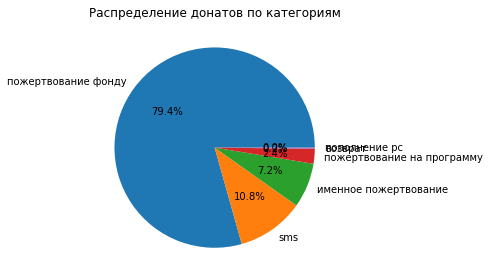

In [51]:
df.purpose_category.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,4))
plt.title('Распределение донатов по категориям')
plt.tight_layout()
plt.axis('off');

### Столбец `channel`

In [52]:
df['channel'].value_counts()

банковские карты              11204
sms                            1474
прямые поступления на счет     1362
наличные в кассу                  3
Name: channel, dtype: int64

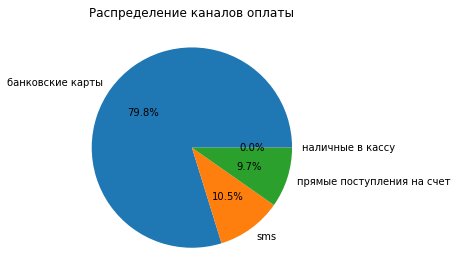

In [53]:
df['channel'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,4))
plt.title('Распределение каналов оплаты')
plt.tight_layout()
plt.axis('off');

Найдем общую сумму взноса в фонд, количество взносов и средний чек каждого доната

In [54]:
t = df.groupby(by='id').agg({'amount': 'sum', 'date_payment' :'count' }).reset_index()
t= t.rename(columns={'amount': 'sum_amount', 'date_payment' :'count'})
t['avg_check'] = t['sum_amount']/ t['count']
t['avg_check'] = t['avg_check'].astype('int')
t

,id,sum_amount,count,avg_check
0,0001afdd-94e3-48f3-b5e7-d5539700425e,100.0,1,100
1,000711b2-2785-461b-bf5b-5cb7d2caba20,10500.0,21,500
2,0015a100-2d8c-4262-a9b3-bb1461c0c8b8,400.0,2,200
3,002cb994-10cd-45e9-b6ed-ed7f3c90d7a9,1000.0,1,1000
4,006f71d7-dfcf-4e7a-b9ad-b4721bef4f7a,200.0,1,200
...,...,...,...,...
3678,ff946fd1-eef8-4541-a906-bae64527aaa5,50.0,1,50
3679,ffa30123-a516-44a7-b030-f83ed369b645,4100.0,27,151
3680,ffb1c4fa-f950-4bb7-a1f2-9dd655298fff,100.0,1,100
3681,ffccba23-89ca-4a22-bd8a-7cad2d9eb7f7,120.0,6,20


Объединим полученные метрики с исходным датасетом

In [55]:
df = df.merge(t, on = 'id', how = 'left')
df.head()

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check
0,0001afdd-94e3-48f3-b5e7-d5539700425e,no_info,0,NaT,2019-04-26 19:19:24,100.0,0,nan,sms,no_info,2019-04-26 19:19:24,2019-04-26 19:19:24,0,sms,100.0,1,100
1,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-03-27 08:23:58,500.0,1,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500
2,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-04-29 08:24:29,500.0,1,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500
3,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-05-28 08:24:10,500.0,1,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500
4,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-07-27 08:24:02,500.0,1,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500


In [56]:
df.describe()

,amount,recur,lifetime,sum_amount,count,avg_check
count,1.404300e+04,14043.000000,14043.000000,1.404300e+04,14043.000000,1.404300e+04
mean,1.720846e+03,0.575732,669.069074,2.616845e+04,19.967172,1.720697e+03
std,2.949977e+04,0.494249,600.987852,1.396660e+05,17.689306,2.768593e+04
min,1.000000e-02,0.000000,0.000000,1.000000e-02,1.000000,0.000000e+00
25%,1.500000e+02,0.000000,120.000000,1.107500e+03,3.000000,1.770000e+02
50%,3.500000e+02,1.000000,585.000000,5.400000e+03,18.000000,4.000000e+02
75%,7.000000e+02,1.000000,942.000000,1.490000e+04,29.000000,8.280000e+02
max,3.000000e+06,1.000000,2486.000000,3.000000e+06,83.000000,3.000000e+06


По неотфильтрованным данным (14043 взноса):<br>
<br>
`amount` - медианное значение - 350 рублей, среднее - 1721 рубль;<br>
 57,6% платежей  - рекуррентный платеж;<br>
`lifetime` -медианное значение - 585 дней, среднее - 669 дней;<br>
`sum_amount` - медианное значение - 5400 рублей, среднее - 26168 рублей;<br>
`count` - медианное значение - 18 взносов, среднее -  почти 20 взносов;<br>
`avg_check` - медианное значение - 400 рублей, среднее - 1720 рублей.

### Подготовка фильтрованного датафрейма

Отсечем пользователей, у которых лайфтайм равен 0, т.к. они сделали всего один платеж и ушли

In [57]:
df_filt= df.query('lifetime>=1 and last_date >= "2020-01-01" and amount < amount.quantile(0.99)\
and purpose not in ["возврат", "пополнение рс"] and channel != "наличные в кассу"')
df_filt['avg_time'] = df_filt['lifetime']/df_filt['count']
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9020 entries, 1 to 14041
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                9020 non-null   object        
 1   gender            9020 non-null   object        
 2   city              9020 non-null   object        
 3   email_date        7998 non-null   datetime64[ns]
 4   date_payment      9020 non-null   datetime64[ns]
 5   amount            9020 non-null   float64       
 6   recur             9020 non-null   int32         
 7   purpose           9020 non-null   object        
 8   channel           9020 non-null   object        
 9   city_category     9020 non-null   object        
 10  first_date        9020 non-null   datetime64[ns]
 11  last_date         9020 non-null   datetime64[ns]
 12  lifetime          9020 non-null   int64         
 13  purpose_category  9020 non-null   object        
 14  sum_amount        9020 

Посмотрим, сколько данных потеряли при фильтрации

In [58]:
100-df_filt.shape[0]/df.shape[0]*100

35.768710389517906

In [59]:
df_filt.head(2)

,id,gender,city,email_date,date_payment,amount,recur,purpose,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check,avg_time
1,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-03-27 08:23:58,500.0,1,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857
2,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,0,2022-07-27 10:16:14,2020-04-29 08:24:29,500.0,1,пожертвование,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857


Удалим первоначальные столбцы, по которым есть категоризированные столбцы

In [60]:
df_filt = df_filt.drop('city', axis=1) 
df_filt = df_filt.drop('purpose', axis=1) 
df_filt.head(2)

,id,gender,email_date,date_payment,amount,recur,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check,avg_time
1,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,2022-07-27 10:16:14,2020-03-27 08:23:58,500.0,1,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857
2,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,2022-07-27 10:16:14,2020-04-29 08:24:29,500.0,1,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857


In [61]:
df_filt.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,9020.000000,9020.000000,9020.000000,9.020000e+03,9020.000000,9020.000000,9020.000000
mean,746.688722,0.693016,891.794346,3.227593e+04,26.116962,1153.099889,43.882092
std,1315.398952,0.461268,577.186103,1.579997e+05,17.388759,3979.693177,51.975762
min,0.160000,0.000000,1.000000,1.690000e+00,2.000000,0.000000,0.142857
25%,150.000000,0.000000,515.000000,3.200000e+03,13.000000,200.000000,28.214286
50%,500.000000,1.000000,791.000000,8.000000e+03,24.000000,466.000000,29.727273
75%,500.000000,1.000000,1158.000000,1.700000e+04,34.000000,797.000000,41.250000
max,12000.000000,1.000000,2486.000000,2.138989e+06,83.000000,80525.000000,823.500000


In [62]:
df_filt.describe(include = 'object')

,id,gender,channel,city_category,purpose_category
count,9020,9020,9020,9020,9020
unique,730,3,3,5,5
top,8a8daecd-40b3-4a41-b53c-06a62be672e6,женский,банковские карты,Москва_МO,пожертвование фонду
freq,83,6804,7867,3635,7757


По отфильтрованным данным (9020 взносов):<br>
<br>
`amount` - медианное значение - 500 рублей, среднее - 746 рубль;<br>
 69,3% платежей  - рекуррентный платеж;<br>
`lifetime` -медианное значение - 791 день, среднее - 891 день;<br>
`sum_amount` - медианное значение - 8000 рублей, среднее - 32276 рублей;<br>
`count` - медианное значение - 24 взноса, среднее - 26 взносов;<br>
`avg_check` - медианное значение - 466 рублей, среднее - 1153 рублей;<br>
`avg_time` -медианное значение - 29 дней, среднее - 43 дня;<br>
- 730 уникальных донатов
- 75,4% взносов делают женщины 
- 3 канала взносов
- 5 категорий городов
- 5 категорий пожертвований

После фильтрации данных улучшились значения всех метрик

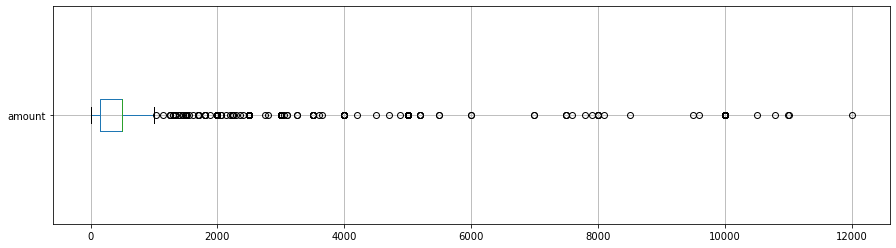

In [63]:
df_filt.boxplot('amount', figsize = (15, 4), vert=False);

По графику видно, что большинство взносов составляет не более 1000 рублей.

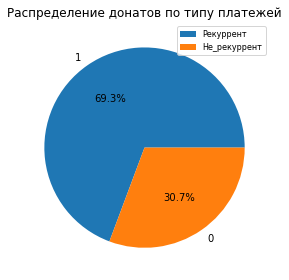

In [64]:
df_filt.recur.value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,4))
plt.legend(["Рекуррент", 'Не_рекуррент'], fontsize=8, facecolor='w')
plt.title('Распределение донатов по типу платежей')
plt.tight_layout()
plt.axis('off');

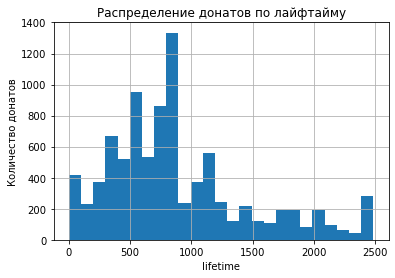

In [65]:
df_filt['lifetime'].hist(bins = 25)
plt.title('Распределение донатов по лайфтайму')
plt.xlabel('lifetime')
plt.ylabel('Количество донатов');

Большинство донатов имеет лайфтайм от 400 до 900 дней

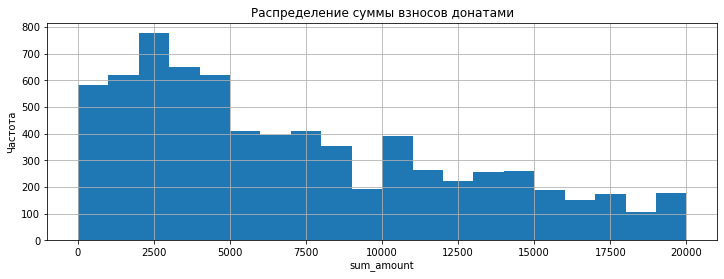

In [66]:
df_filt['sum_amount'].hist(bins = 20, figsize = (12,4), range = (0, 20000))
plt.title('Распределение суммы взносов донатами')
plt.xlabel('sum_amount')
plt.ylabel('Частота');

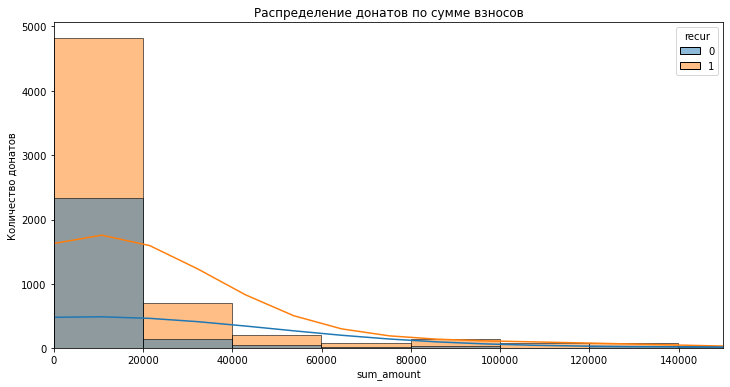

In [67]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_filt, x='sum_amount',hue='recur', kde=True,bins=107, ax=ax)
plt.title('Распределение донатов по сумме взносов')
plt.xlabel('sum_amount')
plt.ylabel('Количество донатов')
plt.xlim(0, 150000);

Построим сравнительные графики метрик для рекуррентов и не рекуррентов

In [68]:
numeric = ['amount', 'lifetime', 'sum_amount', 'count','avg_check', 'avg_time']
object = ['channel', 'city_category', 'purpose_category']

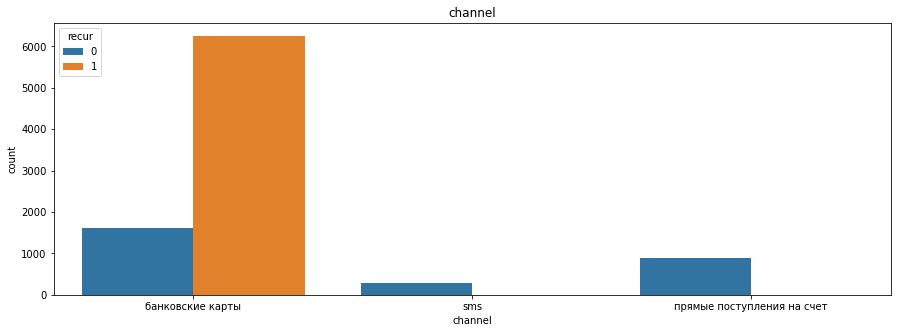

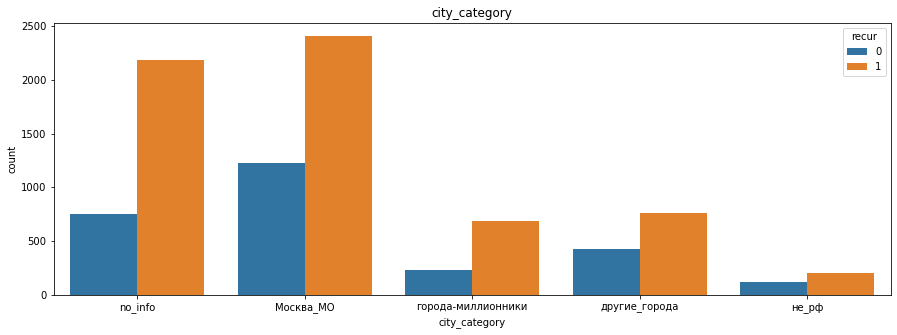

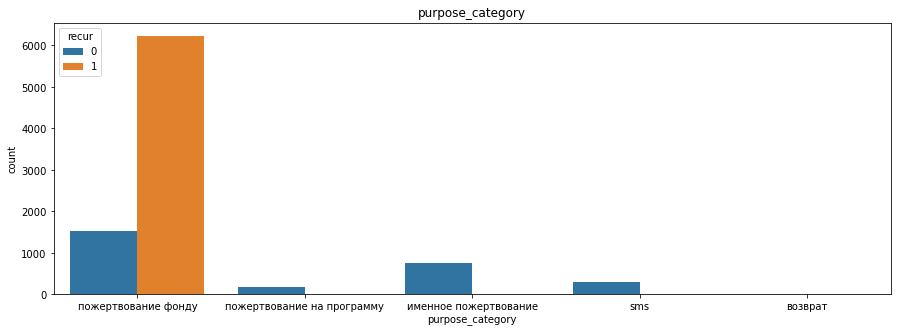

In [69]:
for column in object:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = df_filt[column], hue='recur', data = df_filt)
    plt.title(column);

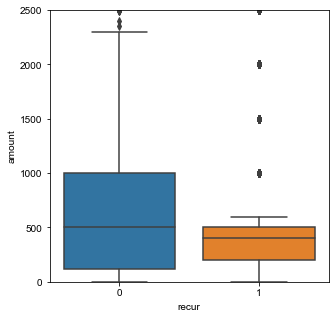

In [70]:
boxplot(df_filt, 'amount', 2500)

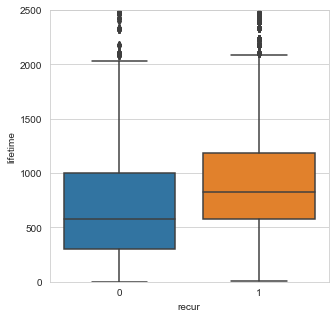

In [71]:
boxplot(df_filt, 'lifetime', 2500)

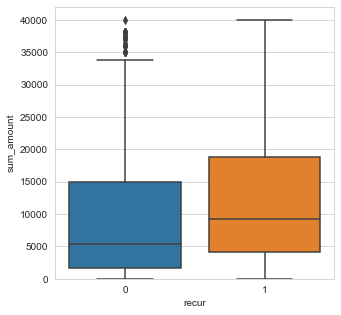

In [72]:
boxplot(df_filt, 'sum_amount', 42000)

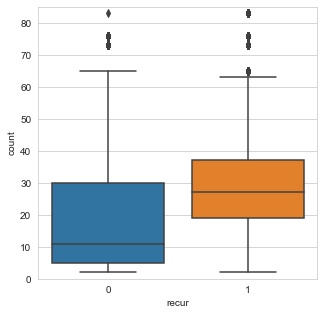

In [73]:
boxplot(df_filt, 'count', 85)

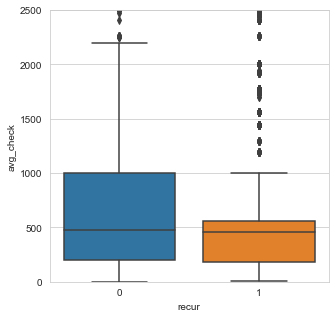

In [74]:
boxplot(df_filt, 'avg_check', 2500)

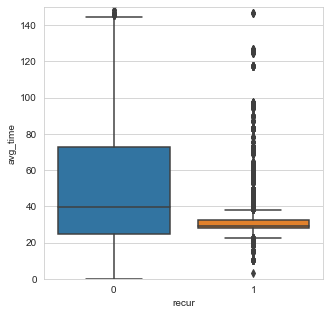

In [75]:
boxplot(df_filt, 'avg_time', 150)

## Датасет донатов, совершающих рекуррентные и не рекуррентные платежи

Проверим на пересечение донатов

In [76]:
df_filt.groupby('id').agg({'recur' : 'nunique'}).query('recur > 1').shape[0]

119

119 человек совершают как рекуррентные так и не рекуррентные платежи в течении лайфтайма

In [77]:
inter=df_filt.groupby('id').agg({'recur' : 'nunique'}).sort_values(by='recur', ascending=False)
inter

,recur
id,
85348172-f358-4345-91f1-db8cf0531c8a,2
414613c0-8aec-455b-a5f4-c9731c9e6e18,2
34b6e23c-03a4-4a70-a96d-dd2e479b957c,2
36a354c3-85df-452d-8023-101faffec7fd,2
d9afa244-944e-45ae-b15e-162550197781,2
...,...
67b305f2-7ae0-4067-8bf8-bf4312f248f8,1
67b4c78f-ab90-4881-9e29-3358f5daaace,1
67bed449-3429-4190-aa55-df8267b7a196,1


In [78]:
intersect_id=inter.query('recur==2').index
intersect_id

Index(['85348172-f358-4345-91f1-db8cf0531c8a',
       '414613c0-8aec-455b-a5f4-c9731c9e6e18',
       '34b6e23c-03a4-4a70-a96d-dd2e479b957c',
       '36a354c3-85df-452d-8023-101faffec7fd',
       'd9afa244-944e-45ae-b15e-162550197781',
       'aafe6af9-fdd2-4ba5-bb2d-9aebac62ed41',
       '6fce2be3-2006-44aa-a1d6-3f3963af38a5',
       '6fa94d8e-7fa1-4331-a7dc-c758bcefa546',
       '39867113-5eb6-42ae-a139-aa2ce74b51b9',
       'd5f6d6f5-34e7-4d39-9f61-d6932241d0da',
       ...
       '07331ea8-413d-452f-b7a6-33a16ed8b1ae',
       '915a49bf-023e-43d3-80b5-87ced58352a7',
       '7dd6a68f-3a8c-42ab-8911-0d0a04736d0f',
       '05343f01-7d7a-4147-8ece-74f6f8da69a8',
       '8993051e-36f1-466b-901e-5e830545d9e6',
       '91478e1b-c882-4f24-a435-fc4930218c4a',
       '8a8daecd-40b3-4a41-b53c-06a62be672e6',
       '1d092fbf-6e44-495d-9abf-3a309929c930',
       'ffa30123-a516-44a7-b030-f83ed369b645',
       '9129ead9-e3f6-4473-8617-d86107280e15'],
      dtype='object', name='id', length=119)

In [79]:
df_intersect=df_filt.query('id in @intersect_id')
df_intersect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2782 entries, 107 to 14034
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                2782 non-null   object        
 1   gender            2782 non-null   object        
 2   email_date        2699 non-null   datetime64[ns]
 3   date_payment      2782 non-null   datetime64[ns]
 4   amount            2782 non-null   float64       
 5   recur             2782 non-null   int32         
 6   channel           2782 non-null   object        
 7   city_category     2782 non-null   object        
 8   first_date        2782 non-null   datetime64[ns]
 9   last_date         2782 non-null   datetime64[ns]
 10  lifetime          2782 non-null   int64         
 11  purpose_category  2782 non-null   object        
 12  sum_amount        2782 non-null   float64       
 13  count             2782 non-null   int64         
 14  avg_check         278

In [80]:
df_intersect.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,2782.000000,2782.00000,2782.000000,2.782000e+03,2782.000000,2782.000000,2782.000000
mean,704.197340,0.81560,1171.444644,6.523984e+04,32.453990,1677.410855,40.464916
std,1357.436553,0.38788,620.277573,2.772319e+05,17.278579,5930.503620,25.410142
min,1.000000,0.00000,6.000000,6.000000e+02,2.000000,73.000000,3.000000
25%,150.000000,1.00000,702.000000,5.200000e+03,21.000000,200.000000,27.275862
50%,300.000000,1.00000,1025.000000,1.050000e+04,29.000000,457.000000,30.107143
75%,500.000000,1.00000,1685.000000,1.910000e+04,39.000000,797.000000,47.363636
max,10000.000000,1.00000,2472.000000,2.138989e+06,83.000000,41134.000000,314.166667


In [81]:
df_intersect.describe(include=['object','datetime64'])

,id,gender,email_date,date_payment,channel,city_category,first_date,last_date,purpose_category
count,2782,2782,2699,2782,2782,2782,2782,2782,2782
unique,119,3,57,2782,3,5,119,119,5
top,8a8daecd-40b3-4a41-b53c-06a62be672e6,женский,2022-07-18 16:29:48,2019-09-28 09:12:34,банковские карты,Москва_МO,2015-11-18 01:20:31,2022-07-02 10:29:51,пожертвование фонду
freq,83,2263,528,1,2727,1390,83,83,2445
first,NaN,NaN,2020-09-02 16:46:29,2015-08-08 14:12:08,NaN,NaN,2015-08-08 14:12:08,2020-02-27 00:41:43,NaN
last,NaN,NaN,2022-07-27 12:38:27,2022-07-28 12:09:37,NaN,NaN,2022-07-14 12:54:18,2022-07-28 12:09:37,NaN


Данные донатов взносящих рекуррентные и не рекурентные платежи (2782 взноса):<br>
<br>
`amount` - медианное значение - 300 рублей, среднее - 704 рубля;<br>
`lifetime` -медианное значение - 1025 день, среднее - 1171 день;<br>
`sum_amount` - медианное значение - 10500 рублей, среднее - 65239 рублей;<br>
`count` - медианное значение - 29 взносов, среднее - 35 взносов;<br>
`avg_check` - медианное значение - 457 рублей, среднее - 1677 рублей;<br>
`avg_time` -медианное значение - 30 дней, среднее - 40 дней;<br>
- 119 уникальных донатов
- 81,3% взносов делают женщины 
- 3 канала взносов
- 5 категорий городов
- 5 категорий пожертвований

In [82]:
len(df_intersect.id.unique())

119

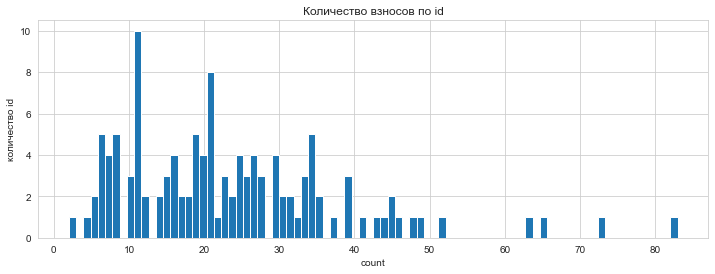

In [83]:
df_intersect.groupby ('id')['count'].mean().hist(bins = 84, figsize = (12, 4))
plt.title('Количество взносов по id')
plt.xlabel('count')
plt.ylabel('количество id');

Найдем донатов которые начали с рекуррентных платежей, но и делающих дополнительные платежи

In [84]:
df_intersect_1= df_intersect.query('recur == 1 and date_payment == first_date')

In [85]:
df_intersect_1.head(2)

,id,gender,email_date,date_payment,amount,recur,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check,avg_time
379,08c3988b-c0ff-44ee-83bf-5a75e18110d2,женский,2022-07-23 01:31:01,2019-11-05 20:59:40,100.0,1,банковские карты,другие_города,2019-11-05 20:59:40,2022-07-18 21:34:18,986,пожертвование фонду,3700.0,37,100,26.648649
559,0b008efd-d8c9-4cdd-9de1-479cba5daeb9,женский,2022-07-18 16:29:48,2020-03-29 22:24:22,150.0,1,банковские карты,no_info,2020-03-29 22:24:22,2021-10-29 22:24:34,579,пожертвование фонду,3100.0,20,155,28.950000


In [86]:
df_intersect_1.shape

(63, 16)

In [87]:
df_intersect_1['id'].nunique()

63

In [88]:
# список двойных донатов, начавших с рекуррентного платежа
a = df_intersect_1['id'].unique()

In [89]:
df_intersect_1.duplicated().sum()

0

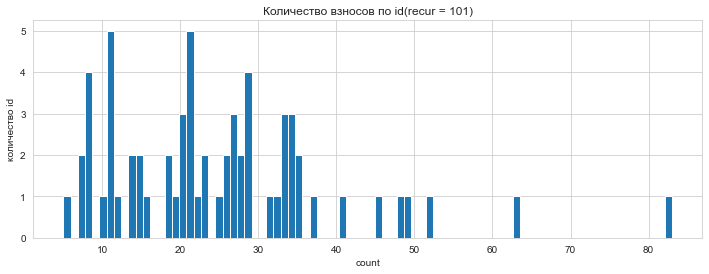

In [90]:
df_intersect_1.groupby ('id')['count'].mean().hist(bins = 84, figsize = (12, 4))
plt.title('Количество взносов по id(recur = 101)')
plt.xlabel('count')
plt.ylabel('количество id');

Найдем донатов которые начали с не рекуррентных платежей и перешли в рекурренты

In [91]:
df_intersect_0= df_intersect.query('recur == 0 and date_payment == first_date')
df_intersect_0.shape

(54, 16)

In [92]:
df_intersect_0.duplicated().sum()

0

In [93]:
# список двойных донатов, начавших с не рекуррентного платежа
b = df_intersect_0['id'].unique()

In [94]:
df_intersect_0['id'].nunique()

54

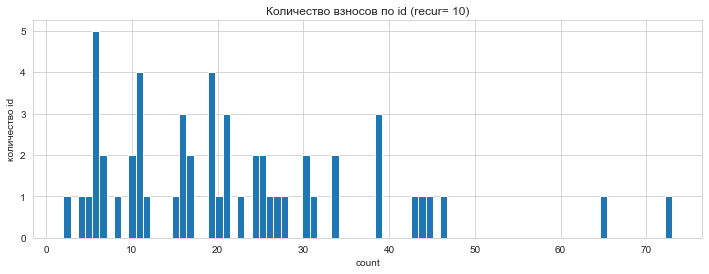

In [95]:
df_intersect_0.groupby ('id')['count'].mean().hist(bins = 84, figsize = (12, 4))
plt.title('Количество взносов по id (recur= 10)')
plt.xlabel('count')
plt.ylabel('количество id');

Проверим пересечение "двойных" донатов

In [96]:
cnt = list(set(df_intersect_1['id'].unique())& set(df_intersect_0['id'].unique()))
cnt

[]

Заменим значение `recur` у двойных агентов (10 - те, кто начал с разовых платежей и перешел в рекурренты; 101 - начали с рекуррентных платежей и имеют дополнительные не рекуррентные взносы) 

In [97]:
df_intersect_0.loc[df_intersect_0['recur'] == 0,'recur'] = '10'
df_intersect_1.loc[df_intersect_1['recur'] == 1,'recur'] = '101'
df_intersect_0['recur'] = pd.to_numeric(df_intersect_0['recur'])
df_intersect_1['recur'] = pd.to_numeric(df_intersect_1['recur'])
df_intersect = pd.concat([df_intersect_0, df_intersect_1], axis = 0)
df_intersect['recur'].value_counts()

101    63
10     54
Name: recur, dtype: int64

Найдем потерявшихся донатов

In [98]:
ab=df_intersect['id'].to_list()
print(len(ab))
cnt1 = list(set(intersect_id)- set(ab))
cnt1

117


['d185b410-aa9a-4870-b39e-9f3f38ff6cb1',
 '7359e58f-bb53-4354-85de-eff6175ede5b']

При детальном просмотре данных донатов - они потеряли часть данных при фильтрации и поэтому не попали ни в одну категорию, не будем их учитывать

In [99]:
a1=df_filt.query('id =="7359e58f-bb53-4354-85de-eff6175ede5b"')
a1.head(2)

,id,gender,email_date,date_payment,amount,recur,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check,avg_time
6087,7359e58f-bb53-4354-85de-eff6175ede5b,женский,2022-07-18 16:29:31,2018-06-09 09:48:02,5000.0,0,банковские карты,города-миллионники,2017-12-21 10:22:02,2022-03-14 15:11:15,1544,пожертвование фонду,290200.0,25,11608,61.76
6088,7359e58f-bb53-4354-85de-eff6175ede5b,женский,2022-07-18 16:29:31,2019-04-20 00:41:54,3000.0,0,банковские карты,города-миллионники,2017-12-21 10:22:02,2022-03-14 15:11:15,1544,пожертвование фонду,290200.0,25,11608,61.76


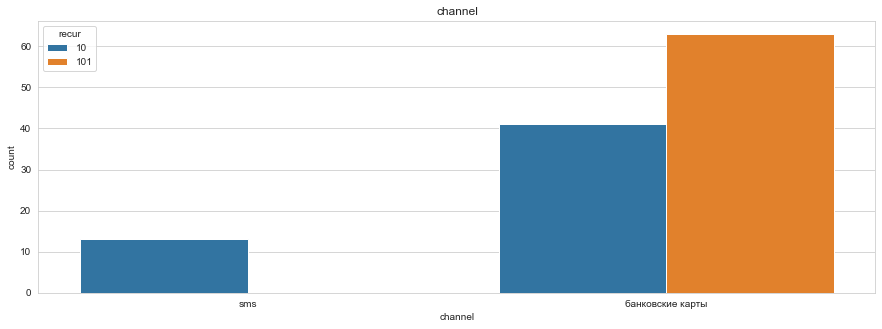

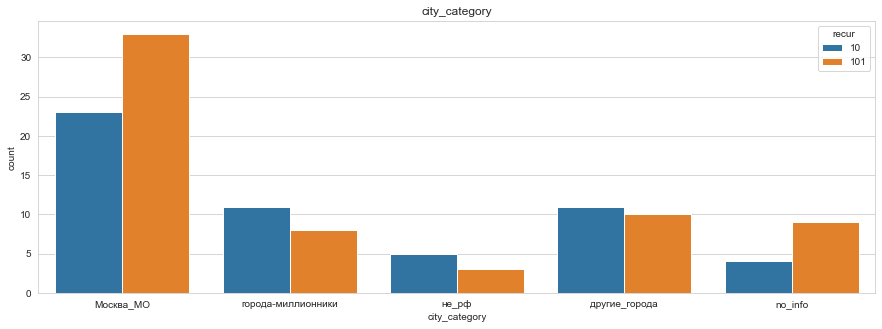

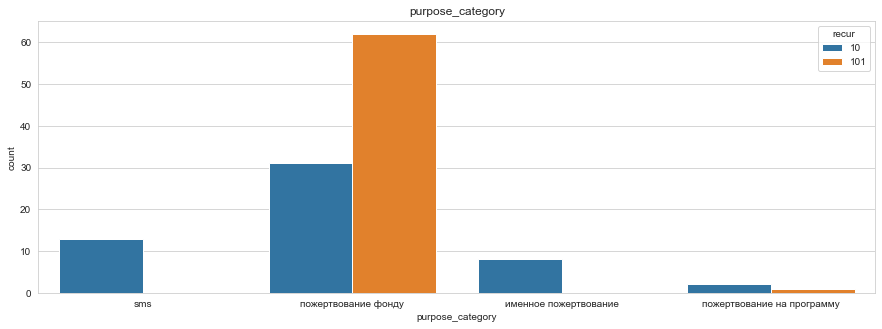

In [100]:
for column in object:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = df_intersect[column], hue='recur', data=df_intersect)
    plt.title(column);

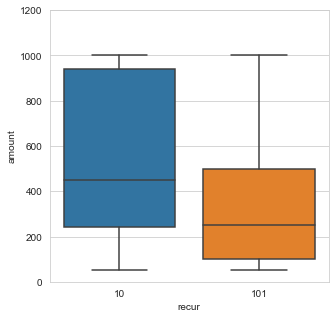

In [101]:
boxplot(df_intersect, 'amount', 1200)

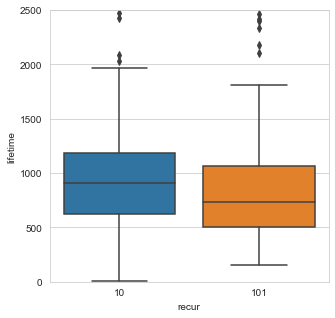

In [102]:
boxplot(df_intersect, 'lifetime', 2500)

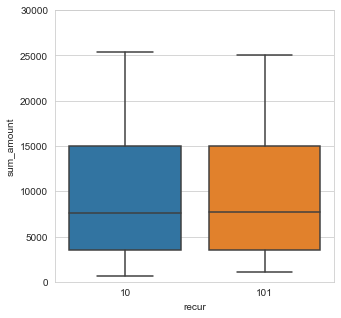

In [103]:
boxplot(df_intersect, 'sum_amount', 30000)

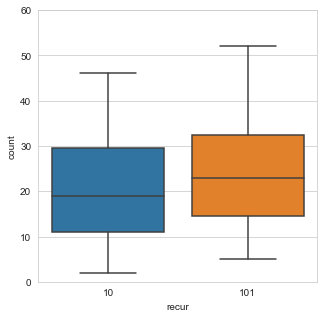

In [104]:
boxplot(df_intersect, 'count', 60)

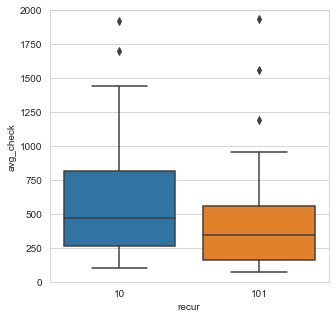

In [105]:
boxplot(df_intersect, 'avg_check', 2000)

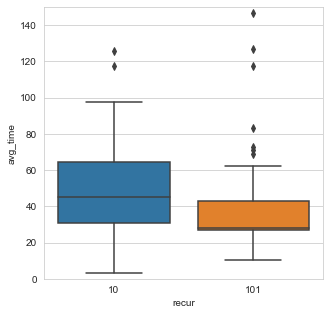

In [106]:
boxplot(df_intersect, 'avg_time', 150)

In [107]:
df_intersect_0.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000
mean,829.907407,10.0,1021.333333,20487.074074,22.018519,797.148148,59.395113
std,1273.514114,0.0,585.589463,55083.226735,15.052726,1423.713062,51.230596
min,50.000000,10.0,6.000000,600.000000,2.000000,100.000000,3.000000
25%,241.250000,10.0,620.000000,3522.500000,11.000000,265.750000,30.550000
50%,450.000000,10.0,905.000000,7625.000000,19.000000,466.000000,45.130435
75%,937.500000,10.0,1182.000000,15025.000000,29.500000,814.750000,64.492898
max,5000.000000,10.0,2472.000000,398000.000000,73.000000,10205.000000,314.166667


In [108]:
df_intersect_1.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,63.000000,63.0,63.000000,6.300000e+01,63.000000,63.000000,63.000000
mean,544.428571,101.0,889.000000,5.749802e+04,24.952381,1720.190476,39.219525
std,950.606304,0.0,589.159023,2.808820e+05,14.292372,6567.211533,25.115277
min,50.000000,101.0,153.000000,1.100000e+03,5.000000,73.000000,10.317460
25%,100.000000,101.0,502.000000,3.550000e+03,14.500000,160.500000,26.657658
50%,250.000000,101.0,730.000000,7.750000e+03,23.000000,341.000000,28.310345
75%,500.000000,101.0,1062.500000,1.500000e+04,32.500000,558.000000,43.093529
max,5000.000000,101.0,2462.000000,2.138989e+06,83.000000,41134.000000,146.625000


## Датасет не рекуррентов 

In [109]:
df_no_recur = df_filt.query('recur == 0 and id not in @intersect_id')
df_no_recur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2256 entries, 29 to 14041
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                2256 non-null   object        
 1   gender            2256 non-null   object        
 2   email_date        1317 non-null   datetime64[ns]
 3   date_payment      2256 non-null   datetime64[ns]
 4   amount            2256 non-null   float64       
 5   recur             2256 non-null   int32         
 6   channel           2256 non-null   object        
 7   city_category     2256 non-null   object        
 8   first_date        2256 non-null   datetime64[ns]
 9   last_date         2256 non-null   datetime64[ns]
 10  lifetime          2256 non-null   int64         
 11  purpose_category  2256 non-null   object        
 12  sum_amount        2256 non-null   float64       
 13  count             2256 non-null   int64         
 14  avg_check         2256

In [110]:
df_no_recur.head()

,id,gender,email_date,date_payment,amount,recur,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check,avg_time
29,00adba34-1edc-4652-a559-1c0be379a0da,женский,2022-07-19 00:58:29,2019-09-10 10:34:52,500.0,0,банковские карты,Москва_МO,2019-09-10 10:34:52,2022-04-13 11:36:54,946,пожертвование на программу,1600.0,4,400,236.5
30,00adba34-1edc-4652-a559-1c0be379a0da,женский,2022-07-19 00:58:29,2020-03-25 14:02:57,500.0,0,банковские карты,Москва_МO,2019-09-10 10:34:52,2022-04-13 11:36:54,946,пожертвование фонду,1600.0,4,400,236.5
31,00adba34-1edc-4652-a559-1c0be379a0da,женский,2022-07-19 00:58:29,2021-03-01 12:28:23,300.0,0,банковские карты,Москва_МO,2019-09-10 10:34:52,2022-04-13 11:36:54,946,именное пожертвование,1600.0,4,400,236.5
32,00adba34-1edc-4652-a559-1c0be379a0da,женский,2022-07-19 00:58:29,2022-04-13 11:36:54,300.0,0,банковские карты,Москва_МO,2019-09-10 10:34:52,2022-04-13 11:36:54,946,именное пожертвование,1600.0,4,400,236.5
45,013339e3-2ca6-4bed-9efe-37b65e0d4106,мужской,2022-07-18 16:29:30,2019-06-06 20:28:04,150.0,0,банковские карты,no_info,2019-06-06 20:28:04,2020-03-03 16:27:26,270,пожертвование фонду,950.0,4,237,67.5


In [111]:
df_no_recur.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,2256.000000,2256.0,2256.000000,2256.000000,2256.000000,2256.000000,2256.000000
mean,1041.400829,0.0,584.491135,18741.498245,15.250443,1447.473848,70.301713
std,1743.784212,0.0,466.835584,45633.443671,16.680505,4161.222648,94.116668
min,0.160000,0.0,1.000000,1.690000,2.000000,0.000000,0.142857
25%,102.000000,0.0,250.000000,1400.000000,4.000000,200.000000,25.000000
50%,500.000000,0.0,512.000000,4100.000000,9.000000,475.000000,40.875000
75%,1000.000000,0.0,795.000000,11318.750000,20.000000,1033.000000,83.461538
max,12000.000000,0.0,2486.000000,322103.500000,76.000000,80525.000000,823.500000


In [112]:
df_no_recur.describe(include = 'object')

,id,gender,channel,city_category,purpose_category
count,2256,2256,2256,2256,2256
unique,398,3,3,5,5
top,f836f738-fb7e-4134-aba8-b6e9ca1e71ea,женский,банковские карты,Москва_МO,пожертвование фонду
freq,76,1519,1158,941,1334


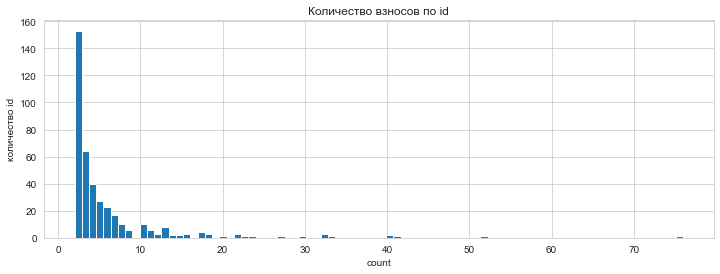

In [113]:
df_no_recur.groupby ('id')['count'].mean().hist(bins = 84, figsize = (12, 4))
plt.title('Количество взносов по id')
plt.xlabel('count')
plt.ylabel('количество id');

In [114]:
df_no_recur1 = df_no_recur.query('count > 30' )
df_no_recur1.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,378.000000,378.0,378.000000,378.000000,378.000000,378.000000,378.000000
mean,879.216931,0.0,814.690476,41639.835979,46.354497,878.891534,20.343915
std,1697.342363,0.0,323.117789,78723.248143,16.165794,1510.511443,11.336346
min,30.000000,0.0,390.000000,1115.000000,32.000000,30.000000,7.644737
25%,35.000000,0.0,581.000000,2280.000000,32.000000,34.000000,9.750000
50%,200.000000,0.0,592.000000,8000.000000,40.000000,200.000000,18.281250
75%,500.000000,0.0,1152.000000,15200.000000,52.000000,475.000000,28.975610
max,10000.000000,0.0,1441.000000,236199.000000,76.000000,4542.000000,43.666667


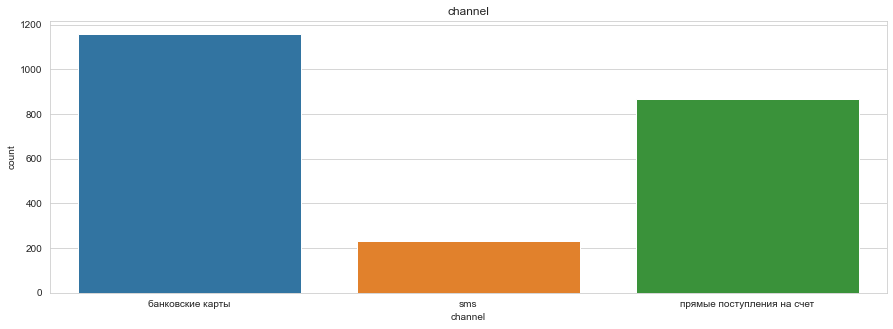

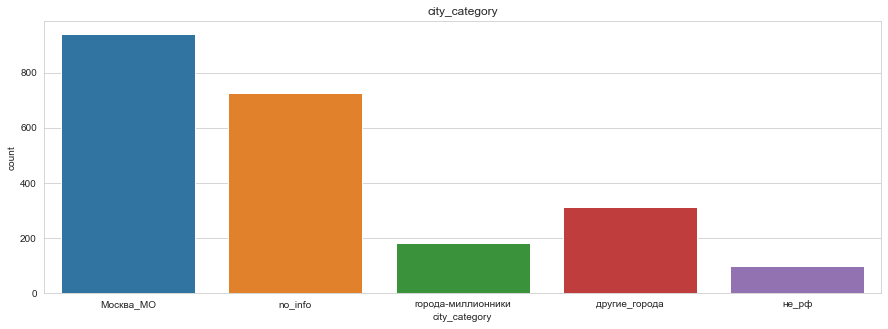

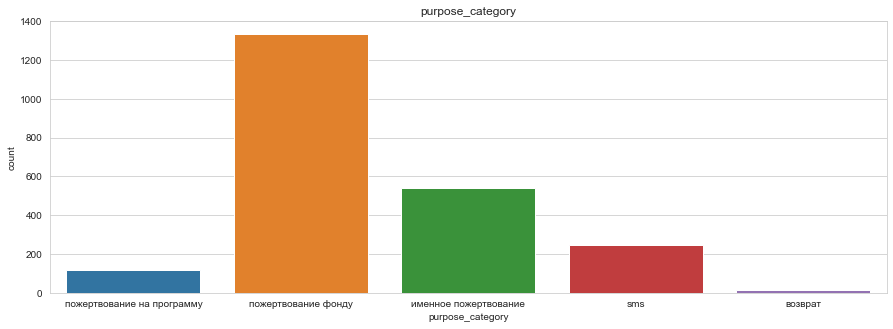

In [115]:
for column in object:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = df_no_recur[column], data=df)
    plt.title(column);

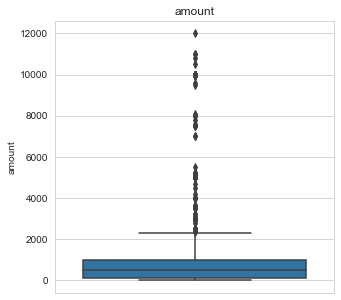

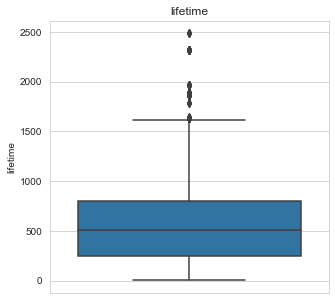

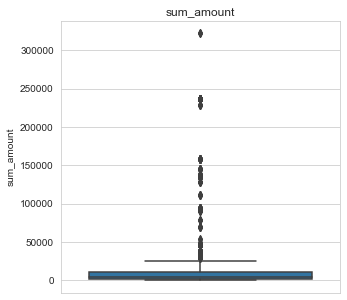

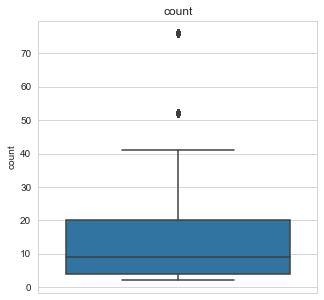

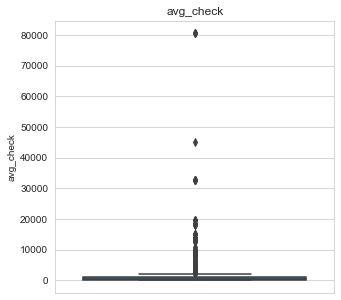

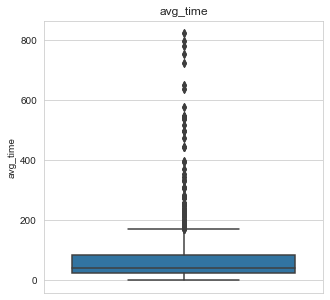

In [116]:
for column in numeric:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y = df_no_recur[column], data = df_filt)
    plt.title(column);

## Датасет рекуррентов

In [117]:
df_recur = df_filt.query('recur == 1 and id not in @intersect_id')
df_recur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3982 entries, 1 to 13992
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                3982 non-null   object        
 1   gender            3982 non-null   object        
 2   email_date        3982 non-null   datetime64[ns]
 3   date_payment      3982 non-null   datetime64[ns]
 4   amount            3982 non-null   float64       
 5   recur             3982 non-null   int32         
 6   channel           3982 non-null   object        
 7   city_category     3982 non-null   object        
 8   first_date        3982 non-null   datetime64[ns]
 9   last_date         3982 non-null   datetime64[ns]
 10  lifetime          3982 non-null   int64         
 11  purpose_category  3982 non-null   object        
 12  sum_amount        3982 non-null   float64       
 13  count             3982 non-null   int64         
 14  avg_check         3982 

In [118]:
df_recur.head()

,id,gender,email_date,date_payment,amount,recur,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check,avg_time
1,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,2022-07-27 10:16:14,2020-03-27 08:23:58,500.0,1,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857
2,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,2022-07-27 10:16:14,2020-04-29 08:24:29,500.0,1,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857
3,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,2022-07-27 10:16:14,2020-05-28 08:24:10,500.0,1,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857
4,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,2022-07-27 10:16:14,2020-07-27 08:24:02,500.0,1,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857
5,000711b2-2785-461b-bf5b-5cb7d2caba20,женский,2022-07-27 10:16:14,2020-08-27 08:24:04,500.0,1,банковские карты,no_info,2020-03-27 08:23:58,2022-06-27 08:24:05,822,пожертвование фонду,10500.0,21,500,39.142857


In [119]:
df_recur.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,3982.000000,3982.0,3982.000000,3982.000000,3982.000000,3982.000000,3982.000000
mean,609.406077,1.0,870.520844,16913.833501,27.846057,620.015821,31.301459
std,917.057367,0.0,503.889232,24228.462022,14.862297,988.936554,9.469034
min,5.000000,1.0,30.000000,15.000000,2.000000,5.000000,15.000000
25%,200.000000,1.0,549.000000,3600.000000,18.000000,200.000000,28.850000
50%,500.000000,1.0,791.000000,8100.000000,25.000000,486.000000,29.379310
75%,500.000000,1.0,1075.500000,18500.000000,36.000000,500.000000,30.433962
max,10000.000000,1.0,2394.000000,140000.000000,76.000000,14857.000000,124.857143


In [120]:
df_recur.describe(include = 'object')

,id,gender,channel,city_category,purpose_category
count,3982,3982,3982,3982,3982
unique,213,3,1,5,2
top,0b6da68c-558b-4153-806e-b1d775585b88,женский,банковские карты,no_info,пожертвование фонду
freq,76,3022,3982,1953,3978


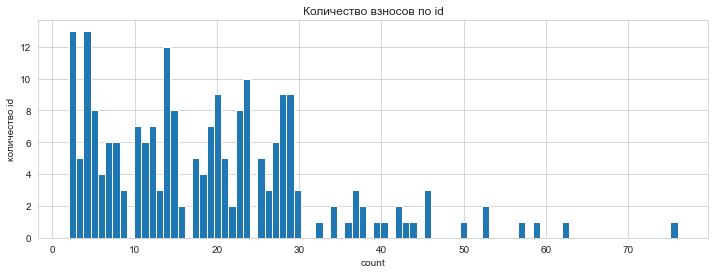

In [121]:
df_recur.groupby ('id')['count'].mean().hist(bins = 84, figsize = (12, 4))
plt.title('Количество взносов по id')
plt.xlabel('count')
plt.ylabel('количество id');

Малое количество рекурентов совершает более 30 взносов в течении лайфтайма

In [122]:
df_recur1 = df_recur.query('count > 30' )
df_recur1.describe()

,amount,recur,lifetime,sum_amount,count,avg_check,avg_time
count,1120.000000,1120.0,1120.000000,1120.000000,1120.000000,1120.000000,1120.000000
mean,747.767857,1.0,1459.110714,32725.267857,47.175893,763.879464,31.015290
std,815.055725,0.0,443.071325,31026.874611,11.356847,799.976181,6.778746
min,100.000000,1.0,702.000000,4300.000000,32.000000,100.000000,15.260870
25%,200.000000,1.0,1157.000000,11400.000000,38.000000,200.000000,29.675676
50%,500.000000,1.0,1365.000000,19000.000000,44.000000,500.000000,29.948193
75%,1000.000000,1.0,1765.000000,34500.000000,53.000000,566.000000,31.744186
max,5000.000000,1.0,2394.000000,110000.000000,76.000000,2500.000000,55.875000


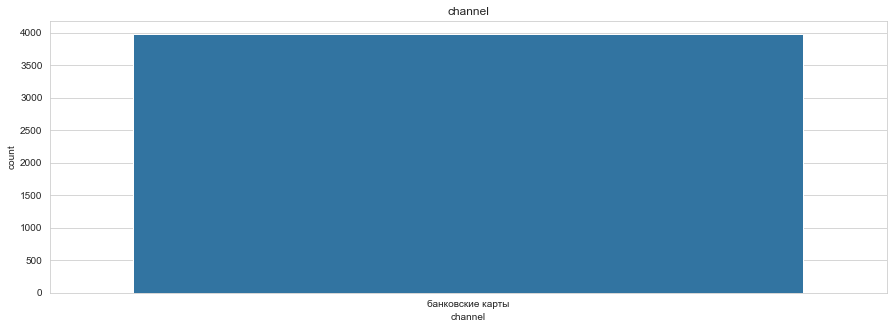

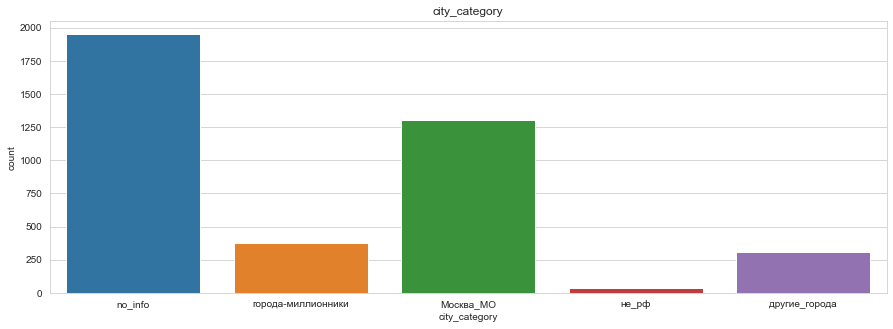

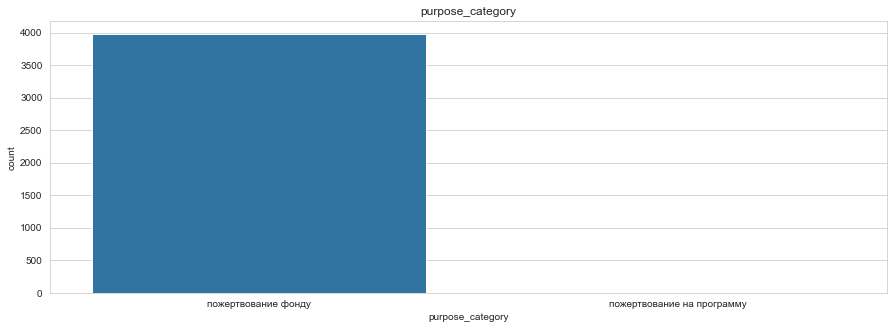

In [123]:
for column in object:
    plt.figure(figsize=(15, 5))
    sns.countplot(x = df_recur[column], data=df)
    plt.title(column);

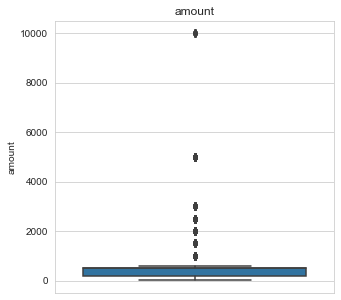

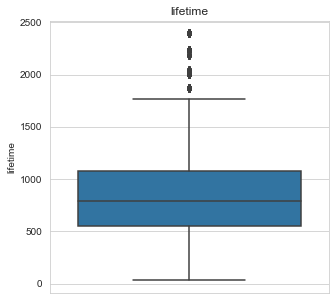

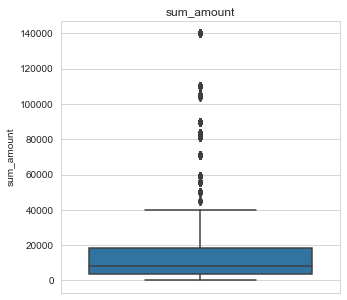

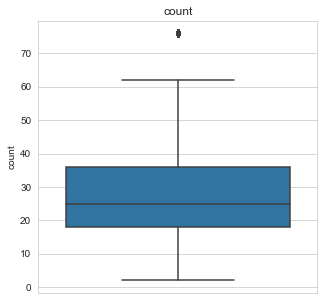

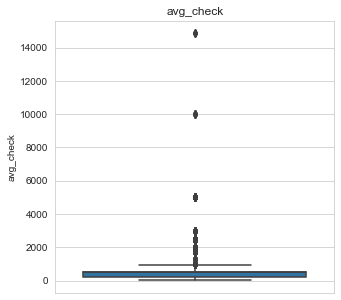

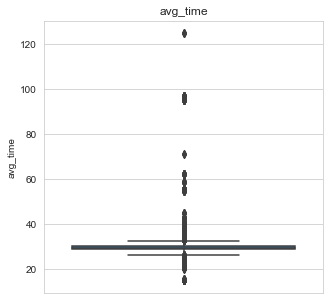

In [124]:
for column in numeric:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y = df_recur[column], data = df_filt)
    plt.title(column);

## Сравнение трех датасетов по параметрам

In [125]:
def hist(col,title, range, bins):
    ax=df_intersect[col].plot(kind='hist',
    range = range,
    bins=bins,
    #linewidth=5,
    alpha=1,
    density = True,                          
    figsize = (15,5),                                                   
    label='intersect',
    )

    df_recur[col].plot(kind='hist',
    range = range,
    bins=bins,
    #linewidth=5,
    alpha=0.5,
    density = True,
    figsize = (15,5),                                                
    label='recur',
    ax=ax,
    grid=True,
    legend=True,
     )

    df_no_recur[col].plot(kind='hist',
    range = range,
    bins=bins,
    #linewidth=5,
    alpha=0.3,
    density = True,                      
    figsize = (15,5),                                                
    label='no_recur',
    ax=ax,
    grid=True,
    legend=True,
    )

    plt.title('Сравнение {} донатов'.format(title))
    plt.xlabel(col)
    plt.legend();

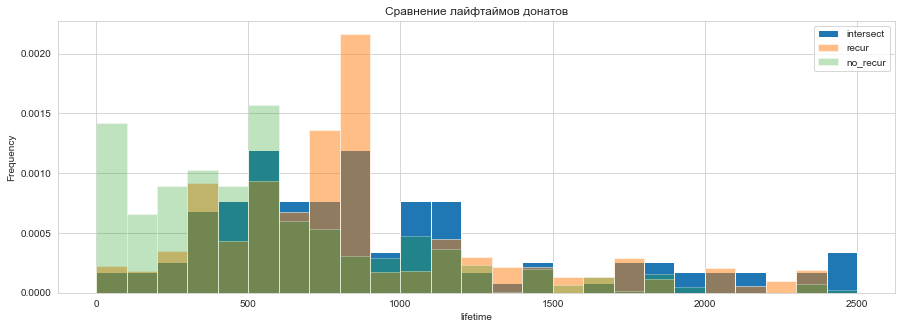

In [126]:
hist('lifetime', 'лайфтаймов', (0, 2500), 25)

- Рекуренты имеют численное преимущество с лайфтаймом от 600 до 900 дней
- Не рекуренты лидеры с лайфтаймом до 500 дней
- Двойные агенты в лидерах с лайфтайму после 950 дней

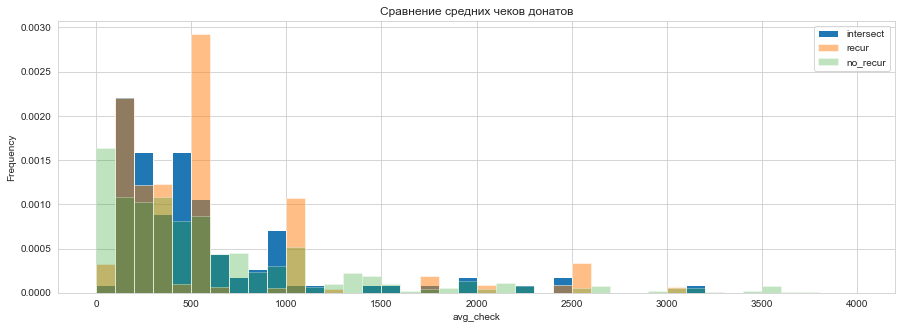

In [127]:
hist('avg_check', 'средних чеков', (0, 4000), 40)

Средний чек

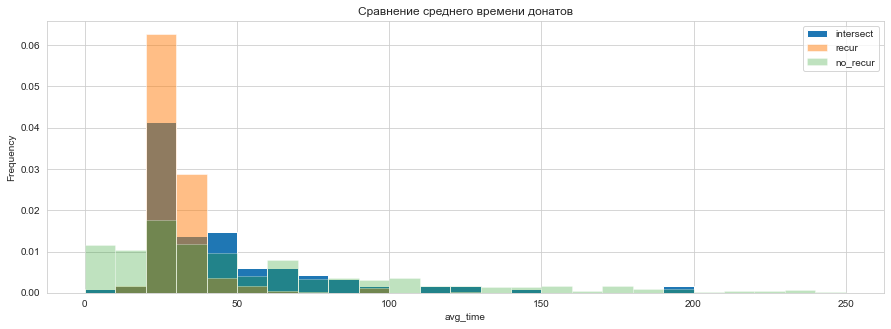

In [128]:
hist('avg_time', 'среднего времени', (0, 250), 25)

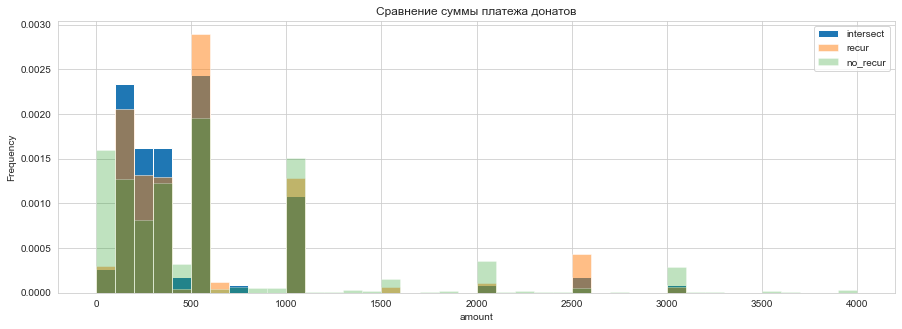

In [129]:
hist('amount', 'суммы платежа', (0,4000), 40)

In [130]:
t = pd.concat([df_intersect, df_recur, df_no_recur], axis = 0)
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6355 entries, 107 to 14041
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                6355 non-null   object        
 1   gender            6355 non-null   object        
 2   email_date        5415 non-null   datetime64[ns]
 3   date_payment      6355 non-null   datetime64[ns]
 4   amount            6355 non-null   float64       
 5   recur             6355 non-null   int64         
 6   channel           6355 non-null   object        
 7   city_category     6355 non-null   object        
 8   first_date        6355 non-null   datetime64[ns]
 9   last_date         6355 non-null   datetime64[ns]
 10  lifetime          6355 non-null   int64         
 11  purpose_category  6355 non-null   object        
 12  sum_amount        6355 non-null   float64       
 13  count             6355 non-null   int64         
 14  avg_check         635

In [131]:
def boxplot1(col, lim):
    fig, ax = plt.subplots(figsize =(5, 5))
    sns.set_style('whitegrid')
    ax = sns.boxplot(x = t['recur'], y = t[col])
    ax.set(ylim = (0,lim));

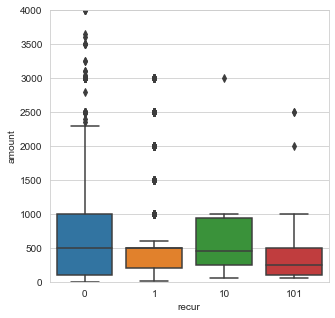

In [132]:
boxplot1('amount', 4000)

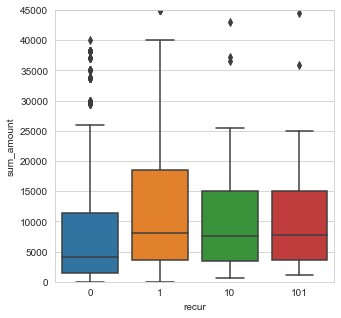

In [133]:
boxplot1('sum_amount', 45000)

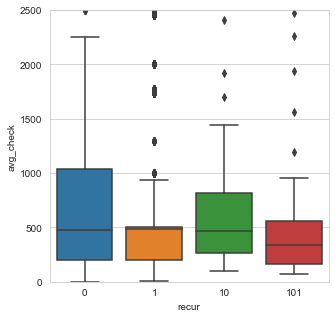

In [134]:
boxplot1('avg_check', 2500)

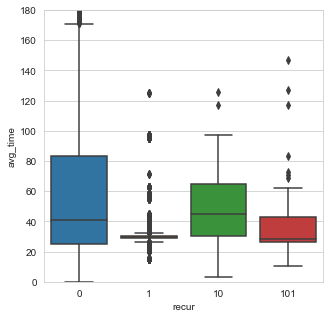

In [135]:
boxplot1('avg_time', 180)

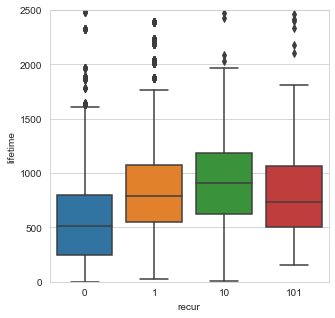

In [136]:
boxplot1('lifetime', 2500)

Введем в итоговую таблицу столбец с оттоком `churn`. Будеи считать, что донат ушел в отток, если количество дней между последним платежом и датой среза данных (29.07.2022) превышает 3 средних времени между платежами каждого доната)

In [137]:
slice_date=pd.to_datetime('2022-07-29')
slice_date

Timestamp('2022-07-29 00:00:00')

In [138]:
(slice_date-t['last_date']).dt.days

107        9
249       22
430      163
937       27
1262       8
        ... 
14037    313
14038    313
14039    313
14040    313
14041    313
Name: last_date, Length: 6355, dtype: int64

In [139]:
t['churn']=(((slice_date-t['last_date']).dt.days)>(3*t['avg_time']))*1

In [140]:
t['churn'].describe()

count    6355.000000
mean        0.441227
std         0.496573
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64

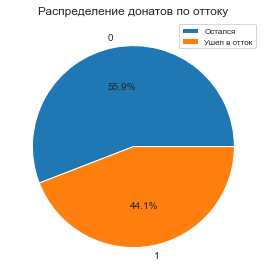

In [141]:
t['churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,4))
plt.legend(['Остался', 'Ушел в отток'], fontsize=8, facecolor='w')
plt.title('Распределение донатов по оттоку')
plt.tight_layout()
plt.axis('off');

44,1% процентов донатов ушли в оттток при соблюдении условий (отсутствие платежа в течение 3-х средних времени между платежами)

## Проверка статистических гипотез

В связи с тем, что будем проверять 2 независимые группы данных, не подчиняющихся нормальному распределению, для проверки гипотез будем использовать:<br>
критерий Манна-Уитни - для количественных переменных;<br>
2sample z-proportion test -  для сравнения долей количественных переменных;<br>
критерий хи-квадрат Пирсона - для сравнения долей качественных переменных.<br>
<br>
При проверке статистических гипотез выберем уровень значимости `alpha= 0.01` для "денежных" переменных и `alpha= 0.05`- для остальных. Проверим 13 гипотез. В связи с множественными проверками гипотез на одном и том же наборе данных растет вероятность ошибки первого рода - применим поправку Бонферрони. 

### Гипотеза № 1: Доли мужчин и женщин, совершающих только разовые платежи, различаются 

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Доли мужчин и женщин, совершающих только разовые платежи равны**

**H1: Доли мужчин и женщин, совершающих только разовые платежи, различаются (не равны)**

In [142]:
q = t.groupby(['gender','recur'])['id'].nunique().to_frame().reset_index()
q

,gender,recur,id
0,no_info,0,37
1,no_info,1,14
2,no_info,10,3
3,no_info,101,1
4,женский,0,259
5,женский,1,165
6,женский,10,45
7,женский,101,52
8,мужской,0,102
9,мужской,1,34


In [143]:
p1=q.iloc[4,2]
p1

259

In [144]:
p2=q.iloc[4,2]+q.iloc[5,2]+q.iloc[6,2]+q.iloc[7,2]
p2

521

In [145]:
q1=q.iloc[8,2]
q1

102

In [146]:
q2=q.iloc[8,2]+q.iloc[9,2]+q.iloc[10,2]+q.iloc[11,2]
q2

152

In [147]:
count = np.array([p1, q1])
nobs = np.array([p2, q2])
alpha=0.5/13
stat, pval = proportions_ztest(count, nobs)
print('p-значение:{0:0.5f}'.format(pval))
if pval < alpha:
    print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:0.00015
Отвергаем нулевую гипотезу


### Гипотеза № 2: Доли мужчин и женщин, совершающих только рекуррентные платежи, различаются 

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Доли мужчин и женщин, совершающих только рекуррентные платежи равны**

**H1: Доли мужчин и женщин, совершающих только рекуррентные платежи, различаются (не равны)**

In [148]:
p1=q.iloc[5,2]
q1=q.iloc[9,2]

In [149]:
count = np.array([p1, q1])
nobs = np.array([p2, q2])
stat, pval = proportions_ztest(count, nobs)
print('p-значение:{0:0.5f}'.format(pval))
if pval < alpha:
    print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:0.02704
Отвергаем нулевую гипотезу


### Гипотеза № 3: Доли мужчин и женщин, совершивших хотя бы 1 рекуррентный платеж, различаются 

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Доли мужчин и женщин, совершивших хотя бы 1 рекуррентный платеж равны**

**H1: Доли мужчин и женщин, совершивших хотя бы 1 рекуррентный платеж, различаются (не равны)**

In [150]:
p1=q.iloc[5,2]+q.iloc[6,2]+q.iloc[7,2]
q1=q.iloc[9,2]+q.iloc[10,2]+q.iloc[11,2]

In [151]:
count = np.array([p1, q1])
nobs = np.array([p2, q2])
stat, pval = proportions_ztest(count, nobs)
print('p-значение:{0:0.5f}'.format(pval))
if pval < alpha:
    print("Отвергаем нулевую гипотезу")
else:
     print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:0.00015
Отвергаем нулевую гипотезу


### Гипотеза № 4: Доли донатов-рекуррентов и не рекуррентов, ушедших в отток, различаются

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Доли донатов-рекуррентов и не рекуррентов, ушедших в отток равны**

**H1: Доли донатов-рекуррентов и не рекуррентов, ушедших в отток, различаются (не равны)**

In [152]:
 a1 = t.groupby(['recur','churn'])['id'].nunique()
 a1   

recur  churn
0      0        158
       1        240
1      0        104
       1        109
10     0         41
       1         13
101    0         41
       1         22
Name: id, dtype: int64

In [153]:
alpha=.05/13
kf_data = np.array([[a1.loc[0,0], a1.loc[0,1]], [a1.loc[1,0], a1.loc[1,1]]])
kf = chi2_contingency(kf_data)
print('p-значение:', kf[1])
if kf[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 0.03691490923123326
Не получилось отвергнуть нулевую гипотезу


### Гипотеза № 5: Доли ушедших в отток и оставшихся донатов-рекуррентов и  донатов-рекуррентов (совершающих дополнительные нерекуррентные платежи), различаются

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Доли ушедших в отток и оставшихся донатов-рекуррентов и  донатов-рекуррентов (совершающих дополнительные нерекуррентные платежи) равны**

**H1: Доли ушедших в отток и оставшихся донатов-рекуррентов и  донатов-рекуррентов (совершающих дополнительные нерекуррентные платежи), различаются (не равны)**

In [154]:
alpha=.05/13
kf_data = np.array([[a1.loc[1,0], a1.loc[1,1]], [a1.loc[10,0]+a1.loc[101,0], a1.loc[10,1]+a1.loc[101,1]]])
kf = chi2_contingency(kf_data)
print('p-значение:', kf[1])
if kf[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  

p-значение: 0.0003071738903873775
Отвергаем нулевую гипотезу


### Гипотеза № 6: Доли мужчин и женщин,  ушедших в отток и оставшихся различаются

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Доли мужчин и женщин, ушедших в отток и оставшихся одинаковы**

**H1: Доли мужчин и женщин, ушедших в отток и оставшихся различаются (не одинаковы)**


In [155]:
 a2 = t.groupby(['gender','churn'])['id'].nunique()
 a2   

gender   churn
no_info  0         20
         1         35
женский  0        257
         1        264
мужской  0         67
         1         85
Name: id, dtype: int64

In [156]:
alpha=.05/13
kf_data = np.array([[a2.loc['женский',0], a2.loc['женский',1]], [a2.loc['мужской',0], a2.loc['мужской',1]]])
kf = chi2_contingency(kf_data)
print('p-значение:', kf[1])
if kf[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")         

p-значение: 0.2949270370655338
Не получилось отвергнуть нулевую гипотезу


### Гипотеза № 7: Доли жителей Москвы_МО и городов-миллионников,  ушедших в отток  и оставшихся различаются

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Доли жителей Москвы_МО и городов-миллионников, ушедших в отток и оставшихся одинаковы**

**H1: Доли жителей Москвы_МО и городов-миллионников, ушедших в отток и оставшихся различаются (не одинаковы)**


In [157]:
a3 = t.groupby(['city_category','churn'])['id'].nunique()
a3  

city_category       churn
no_info             0         83
                    1        178
Москва_МO           0        160
                    1        103
города-миллионники  0         42
                    1         36
другие_города       0         46
                    1         55
не_рф               0         13
                    1         12
Name: id, dtype: int64

In [158]:
alpha=.05/13
kf_data = np.array([[a3.loc['Москва_МO',0], a3.loc['Москва_МO',1]], 
                    [a3.loc['города-миллионники',0], a3.loc['города-миллионники',1]]])
kf = chi2_contingency(kf_data)
print('p-значение:', kf[1])
if kf[1] < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")      

p-значение: 0.33096379999878167
Не получилось отвергнуть нулевую гипотезу


### Гипотеза № 8: Средний чек донатов, ушедших в отток и оставшихся различается

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Средний чек донатов, которые ушли в отток и тех, кто остался равен**

**H1: Средний чек донатов, которые ушли в отток и тех, кто остался различается (не равен)**

In [159]:
mwu_test(0.01/13, 'churn', 'avg_check')

p-значение: 9.062641954804387e-13
Отвергаем нулевую гипотезу


### Гипотеза № 9: Среднее время между платежами донатов, ушедших в отток и оставшихся различается

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Среднее время между платежами донатов, которые ушли в отток и тех, кто остался равно**

**H1: Среднее время между платежами донатов, которые ушли в отток и тех, кто остался различается (не равно)**

In [160]:
mwu_test(0.05/13, 'churn', 'avg_time')

p-значение: 1.842363792160305e-36
Отвергаем нулевую гипотезу


### Гипотеза № 10: Лайфтайм донатов,  ушедших в отток и оставшихся различается

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Лайфтайм донатов, которые ушли в отток и тех, кто остался равен**

**H1: Лайфтайм донатов, которые ушли в отток и тех, кто остался различается (не равен)**

In [161]:
mwu_test(0.05/13, 'churn', 'lifetime')

p-значение: 7.72974895019062e-161
Отвергаем нулевую гипотезу


### Гипотеза № 11: Средний чек донатов, совершаюших разовые и рекуррентные платежи различается

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Средний чек донатов, совершаюших разовые и рекуррентные платежи равен**

**H1: Средний чек донатов, совершаюших разовые и рекуррентные платежи различается (не равен)**

In [162]:
mwu_test(0.01/13, 'recur', 'avg_check')

p-значение: 3.0887230593769616e-14
Отвергаем нулевую гипотезу


### Гипотеза № 12: Среднее время между платежами донатов, совершаюших разовые и рекуррентные платежи различается

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Среднее время между платежами донатов, совершаюших разовые и рекуррентные платежи равно**

**H1: Среднее время между платежами донатов, совершаюших разовые и рекуррентные платежи различается (не равно)**

In [163]:
mwu_test(0.05/13, 'recur', 'avg_time')

p-значение: 1.831431844876492e-59
Отвергаем нулевую гипотезу


### Гипотеза № 13: Лайфтайм донатов, совершаюших разовые и рекуррентные платежи различается

Сформулируем нулевую и альтернативную гипотезы так:

**H0: Лайфтайм донатов, совершаюших разовые и рекуррентные платежи равен**

**H1: Лайфтайм донатов, совершаюших разовые и рекуррентные платежи различается (не равен)**

In [164]:
mwu_test(0.05/13, 'recur', 'lifetime')

p-значение: 4.332567453015242e-135
Отвергаем нулевую гипотезу


### Вывод

Не получилось отвергнуть следующие гипотезы:
<br>
 - Доли донатов-рекуррентов и не рекуррентов, ушедших в отток, равны;<br>
 - Доли мужчин и женщин, ушедших в отток и оставшихся равны;<br>
 - Доли жителей Москвы_МО и городов-миллионников, ушедших в отток и оставшихся равны.<br>
<br>
Есть статистически значимая разница между:<br>
<br>
 - Долями мужчин и женщин, совершающих только разовые платежи;<br>
 - Долями мужчин и женщин, совершающих только рекуррентные платежи;<br>
 - Долями мужчин и женщин, совершивших хотя бы 1 рекуррентный платеж;<br>
 - Долями ушедших в отток и оставшихся донатов-рекуррентов и донатов-рекуррентов (совершающих дополнительные нерекуррентные платежи);<br>
 - Средними чеками донатов, которые ушли в отток и тех, кто остался;<br>
 - Средним временем между платежами донатов, которые ушли в отток и тех, кто остался;<br>
 - Лайфтаймом донатов, которые ушли в отток и тех, кто остался;<br>
 - Средними чеками донатов, совершаюших разовые и рекуррентные платежи;<br>
 - Средним временем между платежами донатов, совершаюших разовые и рекуррентные платежи;<br>
 - Лайфтаймом донатов, совершаюших разовые и рекуррентные платежи.<br>

## Кластеризация

In [165]:
cluster = t.copy()
cluster.head(1)

,id,gender,email_date,date_payment,amount,recur,channel,city_category,first_date,last_date,lifetime,purpose_category,sum_amount,count,avg_check,avg_time,churn
107,05343f01-7d7a-4147-8ece-74f6f8da69a8,женский,2022-07-18 19:48:43,2019-09-28 09:12:34,200.0,10,sms,Москва_МO,2019-09-28 09:12:34,2022-07-19 12:56:29,1025,sms,37300.0,45,828,22.777778,0


In [166]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6355 entries, 107 to 14041
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                6355 non-null   object        
 1   gender            6355 non-null   object        
 2   email_date        5415 non-null   datetime64[ns]
 3   date_payment      6355 non-null   datetime64[ns]
 4   amount            6355 non-null   float64       
 5   recur             6355 non-null   int64         
 6   channel           6355 non-null   object        
 7   city_category     6355 non-null   object        
 8   first_date        6355 non-null   datetime64[ns]
 9   last_date         6355 non-null   datetime64[ns]
 10  lifetime          6355 non-null   int64         
 11  purpose_category  6355 non-null   object        
 12  sum_amount        6355 non-null   float64       
 13  count             6355 non-null   int64         
 14  avg_check         635

In [167]:
cluster['recur'] = cluster['recur'].astype('object')

In [168]:
cluster= pd.get_dummies(cluster)
cluster.head()

,email_date,date_payment,amount,first_date,last_date,lifetime,sum_amount,count,avg_check,avg_time,...,city_category_no_info,city_category_Москва_МO,city_category_города-миллионники,city_category_другие_города,city_category_не_рф,purpose_category_sms,purpose_category_возврат,purpose_category_именное пожертвование,purpose_category_пожертвование на программу,purpose_category_пожертвование фонду
107,2022-07-18 19:48:43,2019-09-28 09:12:34,200.0,2019-09-28 09:12:34,2022-07-19 12:56:29,1025,37300.0,45,828,22.777778,...,0,1,0,0,0,1,0,0,0,0
249,2022-07-18 16:29:48,2019-08-30 10:27:15,5000.0,2019-08-30 10:27:15,2022-07-06 20:54:29,1041,16000.0,23,695,45.260870,...,0,1,0,0,0,0,0,0,0,1
430,2022-07-18 16:29:48,2020-03-06 19:49:09,500.0,2020-03-06 19:49:09,2022-02-15 22:12:22,711,5100.0,11,463,64.636364,...,0,1,0,0,0,0,0,1,0,0
937,2022-07-18 16:29:48,2019-09-10 10:30:01,100.0,2019-09-10 10:30:01,2022-07-01 16:35:48,1025,2300.0,16,143,64.062500,...,0,0,1,0,0,0,0,0,0,1
1262,2022-07-20 22:52:36,2022-07-14 12:54:18,500.0,2022-07-14 12:54:18,2022-07-20 22:17:48,6,600.0,2,300,3.000000,...,0,0,0,0,1,0,0,0,1,0


In [169]:
cluster.columns.to_list()

['email_date',
 'date_payment',
 'amount',
 'first_date',
 'last_date',
 'lifetime',
 'sum_amount',
 'count',
 'avg_check',
 'avg_time',
 'churn',
 'id_000711b2-2785-461b-bf5b-5cb7d2caba20',
 'id_00adba34-1edc-4652-a559-1c0be379a0da',
 'id_00b01874-b85a-4e15-8888-f38cb255fa76',
 'id_013339e3-2ca6-4bed-9efe-37b65e0d4106',
 'id_01693e9d-1d01-4f1f-b495-9457b346db0d',
 'id_02e2115f-1ea4-4054-8278-261cd396a96d',
 'id_0357f974-9460-450d-bb99-452083c08bbb',
 'id_03ee1cc8-7e91-4603-a99b-6c530e4afee1',
 'id_03f6cf3e-963b-495a-a29e-112121e51943',
 'id_04c6b221-1556-4aa6-8554-5a995bb41db0',
 'id_051a9746-0cad-4629-81be-4e8b7119effc',
 'id_05343f01-7d7a-4147-8ece-74f6f8da69a8',
 'id_05354f3c-0487-46f3-85ad-fb7cfc665bda',
 'id_05b8107b-349d-440b-92b0-ef081b5065a3',
 'id_063a7055-dc3b-4ff6-ba78-9e41f9a219b8',
 'id_07331ea8-413d-452f-b7a6-33a16ed8b1ae',
 'id_074f9df1-04e7-4877-a16d-b5d207c4f99e',
 'id_080cd6f8-b007-4c01-9142-bee9195ab3d9',
 'id_08b254b8-e5ac-4d6a-905a-b882b1f8b551',
 'id_08c3988b-c0f

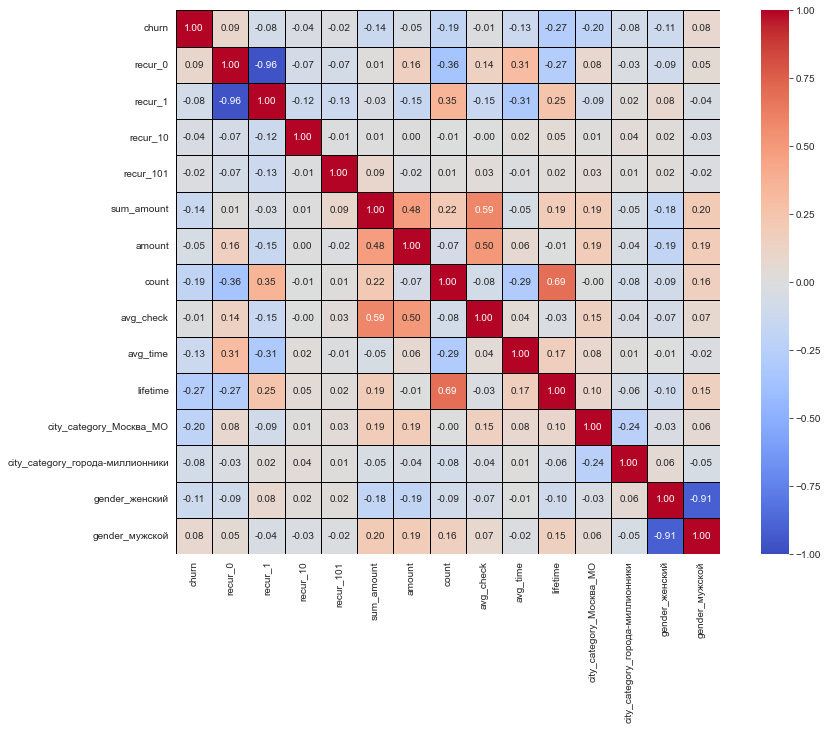

In [170]:
cm = cluster[['churn', 'recur_0', 'recur_1', 'recur_10', 'recur_101', 'sum_amount', 'amount', 'count', 
              'avg_check', 'avg_time', 'lifetime', 'city_category_Москва_МO',
       'city_category_города-миллионники', 'gender_женский', 'gender_мужской']].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True,fmt = '0.2f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=.5, linecolor='black',
           square=True)
plt.show()

- на отток сильнее всего влияют:<br>
     `lifetime` (слабая связь по шкале Чеддока),<br>
     место проживания - город `Москва и МО` (слабая связь),<br>
     параметр `count`(слабая связь).

In [171]:
cluster1 = cluster[['churn', 'recur_0', 'recur_1', 'sum_amount', 'amount', 'count', 
              'avg_check', 'avg_time', 'lifetime', 'city_category_Москва_МO',
       'city_category_города-миллионники', 'gender_женский', 'gender_мужской']]

In [172]:
cluster1.shape

(6355, 13)

In [173]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [174]:
sc = StandardScaler()
X_sc = sc.fit_transform(cluster1)

In [175]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(X_sc)
cluster1['cluster'] = labels

In [176]:
cluster1.cluster.value_counts()

1    3084
0    2057
3     954
2     260
Name: cluster, dtype: int64

In [177]:
cluster1.groupby('cluster').mean()

,churn,recur_0,recur_1,sum_amount,amount,count,avg_check,avg_time,lifetime,city_category_Москва_МO,city_category_города-миллионники,gender_женский,gender_мужской
cluster,,,,,,,,,,,,,
0,0.517744,0.989305,0.000000,6514.629431,618.727501,14.381138,655.390860,72.723734,563.854643,0.386485,0.088478,0.690812,0.237725
1,0.386187,0.000000,0.975357,11001.109922,442.580739,24.063554,440.953632,31.241487,748.730220,0.304150,0.111543,0.976978,0.000000
2,0.346154,0.784615,0.196154,143377.274231,5427.606923,22.246154,9055.284615,41.455123,655.657692,0.784615,0.007692,0.492308,0.465385
3,0.480084,0.017820,0.967505,31188.967505,845.230608,40.325996,863.111111,33.754133,1317.380503,0.381551,0.052411,0.079665,0.920335


Выделяются 3 основных кластера:<br>
`1`(самый многочисленный) - женщины с рекуррентными платежами 1 раз/31 день (1 мес.) с 24 взносами и лайфтаймом чуть более 2 лет, доля оттока - 39%;<br>
`0`- кластер донатов с не рекуррентными платежами, средним чеком -655 руб. и средним временем между платежами -72 дня (2 мес.) (69%-женщины), доля оттока- 52%;<br>
`3` - мужчины с рекуррентными платежами  1 раз/34 дня (1 мес.) с 40 взносами и лайфтаймом 3.6 лет, доля оттока - 48%.

In [178]:
churn = cluster1.groupby('churn').agg('mean').T
churn

churn,0,1
recur_0,0.316531,0.403709
recur_1,0.660377,0.583809
sum_amount,23331.387750,11237.740421
amount,823.876556,688.153930
count,26.112081,19.730742
avg_check,956.174880,888.175820
avg_time,52.242180,36.879194
lifetime,892.509434,615.864479
city_category_Москва_МO,0.448888,0.252140
city_category_города-миллионники,0.111518,0.064907


In [179]:
category=['churn','recur_0', 'recur_1', 'city_category_Москва_МO',
       'city_category_города-миллионники', 'gender_женский', 'gender_мужской']

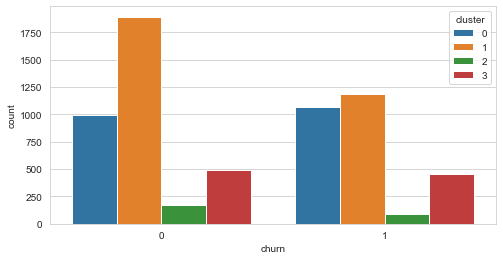

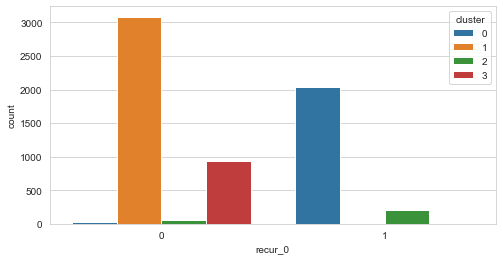

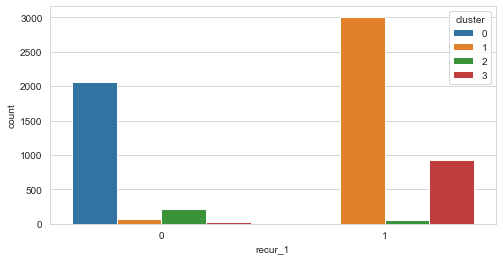

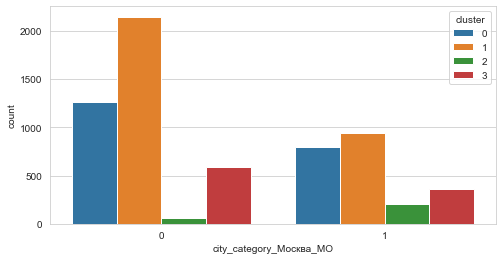

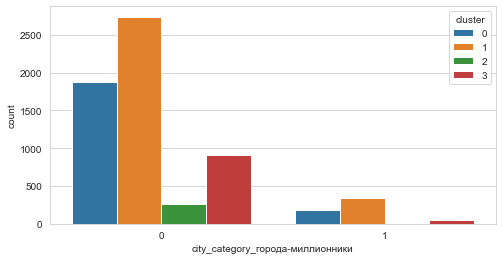

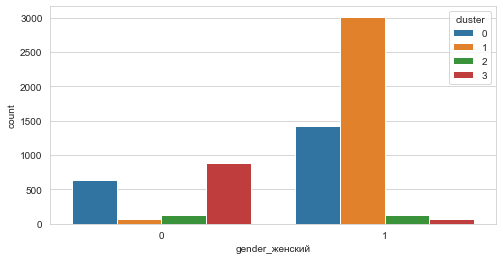

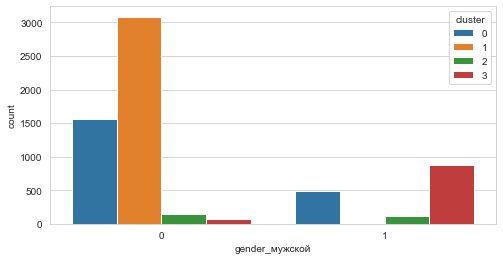

In [180]:
for column in category:
    plt.figure(figsize=(8, 4))
    sns.countplot(x = cluster1[column], hue='cluster', data=cluster1);

In [181]:
numeric=['sum_amount', 'amount', 'count', 'avg_check', 'avg_time', 'lifetime']

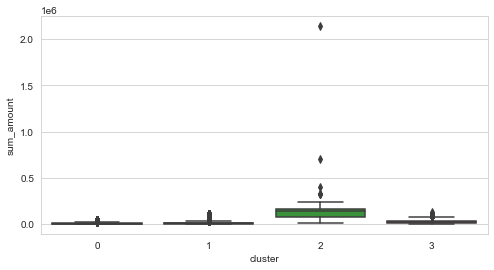

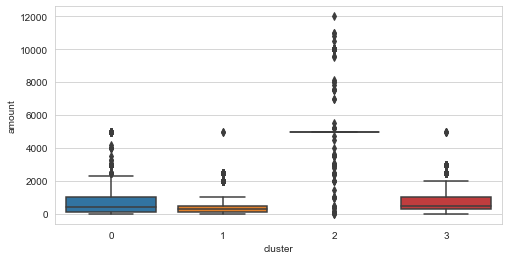

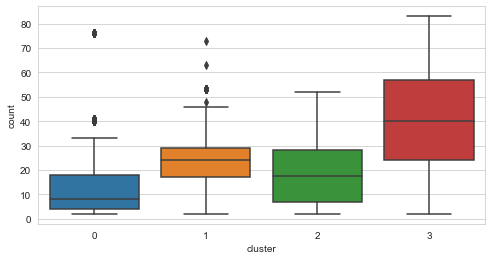

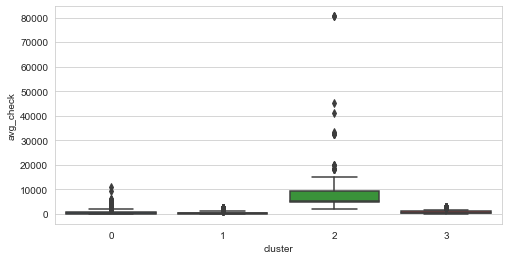

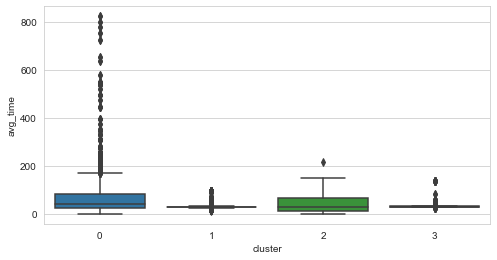

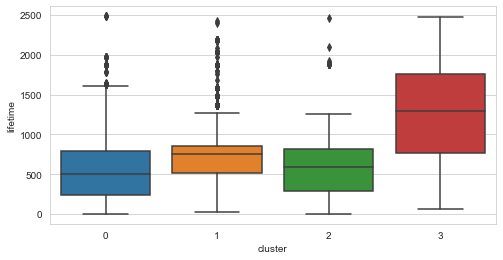

In [182]:
for column in numeric:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x = 'cluster', y = cluster1[column], data = cluster1);